## <b> -------------------------------------Regression: Airbnb price prediction---------------------------------- 

Source: https://www.kaggle.com/rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml
        
Train dataset has been taken from this link which contains 74111 rows and 27 columns. We have randomly selected 4692 rows as our main dataset. 
Following are the attributes name and description:

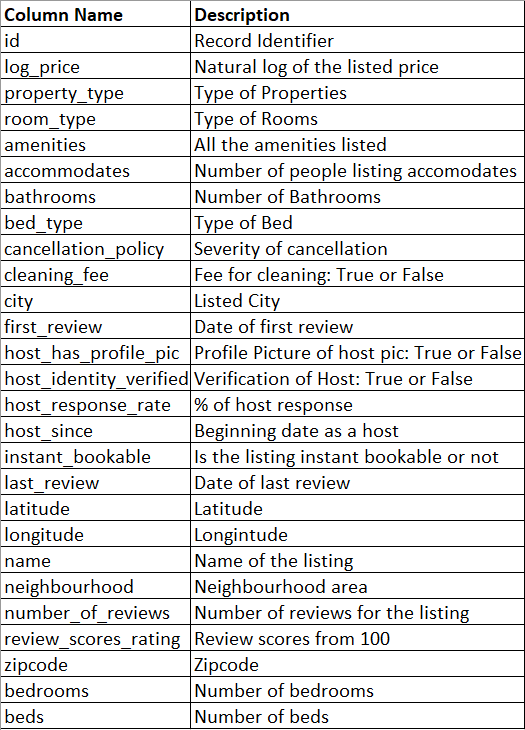

In [1]:
##for showing all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing basic libraries used throughout
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

In [3]:
#Reading the datset stored in the csv file format.
ab = pd.read_csv(r'airbnb.csv')
ab.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,2404,4.624973,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,...,02-02-17,40.726764,-73.989965,East Village Pied-à-Terre aka Ultimate Crash Pad!,East Village,1,100.0,10003,0.0,1.0
1,4967,5.010635,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,...,23-04-17,33.992372,-118.474384,1 MINUTE WALK TO VENICE BEACH,Venice,143,89.0,90291,0.0,1.0
2,5178,5.393628,Loft,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.5,Real Bed,strict,True,...,09-10-16,38.902875,-77.016829,"""The Premier"" Loft Downtown DC 905",Mount Vernon Square,14,92.0,20001,1.0,1.0
3,8739,3.761200,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,...,11-09-17,40.583410,-73.933741,A room Just for you.,Sheepshead Bay,13,80.0,11235,1.0,1.0
4,10766,4.584967,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,strict,True,...,30-04-17,38.928868,-77.028272,Bright 1 Bdrm in Columbia Heights,Columbia Heights,21,95.0,20009,1.0,1.0


In [4]:
#Viewing the summary of dataset for understanding the data we are dealing with.
ab.info()
ab.describe()
ab.describe(include='O')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 27 columns):
id                        4692 non-null int64
log_price                 4692 non-null float64
property_type             4692 non-null object
room_type                 4692 non-null object
amenities                 4692 non-null object
accommodates              4692 non-null int64
bathrooms                 4547 non-null float64
bed_type                  4692 non-null object
cancellation_policy       4692 non-null object
cleaning_fee              4692 non-null bool
city                      4692 non-null object
first_review              3683 non-null object
host_has_profile_pic      4684 non-null object
host_identity_verified    4684 non-null object
host_response_rate        3534 non-null object
host_since                4684 non-null object
instant_bookable          4692 non-null object
last_review               3684 non-null object
latitude                  4692 non-null float64
l

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,4.692000e+03,4692.000000,4692.000000,4547.000000,4692.000000,4692.000000,4692.000000,3622.000000,4688.000000,4560.000000
mean,1.122780e+07,4.779618,3.183717,1.246646,38.476560,-92.298923,21.158142,93.988680,1.274744,1.720175
std,6.160669e+06,0.713325,2.164895,0.597534,3.074185,21.648146,39.766046,7.714717,0.862183,1.230680
min,2.404000e+03,2.302585,1.000000,0.000000,33.709092,-122.510941,0.000000,20.000000,0.000000,0.000000
25%,6.165070e+06,4.317488,2.000000,1.000000,34.127947,-118.339478,1.000000,91.000000,1.000000,1.000000
50%,1.217456e+07,4.727388,2.000000,1.000000,40.668831,-76.999725,5.000000,96.000000,1.000000,1.000000
75%,1.645232e+07,5.194342,4.000000,1.000000,40.744591,-73.954458,23.000000,100.000000,1.000000,2.000000
max,2.122720e+07,7.575585,16.000000,8.000000,42.389031,-70.999166,525.000000,100.000000,9.000000,16.000000


,property_type,room_type,amenities,bed_type,cancellation_policy,city,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,zipcode
count,4692,4692,4692,4692,4692,4692,3683,4684,4684,3534,4684,4692,3684,4692,4267,4632
unique,23,3,4584,5,5,6,1364,2,2,49,2098,2,688,4686,404,456
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,22-01-17,t,t,100%,14-02-14,f,30-04-17,Huge sunny bedroom in Dupont Circle,Williamsburg,11211
freq,3188,2640,37,4549,2057,2063,17,4670,3133,2727,15,3444,91,2,196,105


In [5]:
#Making a copy of the orignal dataset
airbnb=ab.copy()

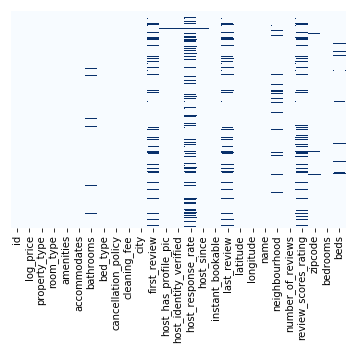

In [6]:
#Visualizing the null values in the dataset. As can be noticed from the blue dash lines, lot of null values in few columns,
#which will be treated consequently.
sns.heatmap(airbnb.isnull(), yticklabels = False, cbar = False, cmap="Blues")

<Figure size 432x864 with 0 Axes>

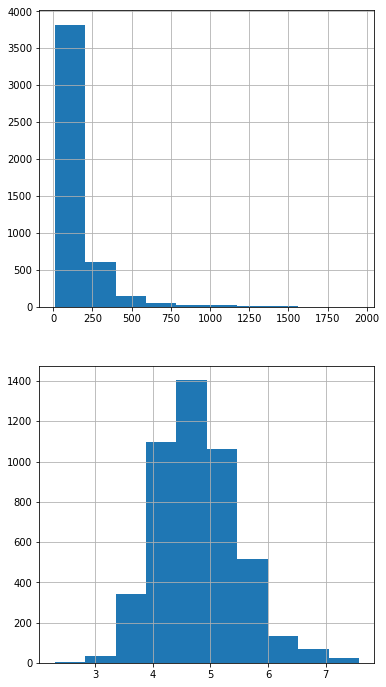

In [7]:
#Our target variable is log_price. After converting the target variable by taking the inverse of log, 
#the variable is highly right skewed. So, keeping the target variable as it is because of normal distribution pattern.
plt.figure(figsize=[6,12])
plt.subplot(211)
np.exp(airbnb['log_price']).hist()
plt.subplot(212)
airbnb['log_price'].hist()

In [8]:
#We cannot make assumption from our side whether the host is verified or not, hence dropping the null values in the column.
airbnb.dropna(subset=['host_identity_verified'], inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4684 entries, 0 to 4691
Data columns (total 27 columns):
id                        4684 non-null int64
log_price                 4684 non-null float64
property_type             4684 non-null object
room_type                 4684 non-null object
amenities                 4684 non-null object
accommodates              4684 non-null int64
bathrooms                 4539 non-null float64
bed_type                  4684 non-null object
cancellation_policy       4684 non-null object
cleaning_fee              4684 non-null bool
city                      4684 non-null object
first_review              3676 non-null object
host_has_profile_pic      4684 non-null object
host_identity_verified    4684 non-null object
host_response_rate        3534 non-null object
host_since                4684 non-null object
instant_bookable          4684 non-null object
last_review               3676 non-null object
latitude                  4684 non-null float64
l

### Before data processing and data imputation, we will split the data into train and test datset.

In [9]:
#Target Label
y= airbnb['log_price']
y

0       4.624973
1       5.010635
2       5.393628
3       3.761200
4       4.584967
          ...   
4687    4.941642
4688    5.298317
4689    4.595120
4690    4.007333
4691    4.317488
Name: log_price, Length: 4684, dtype: float64

In [10]:
#Independent attributes
X = airbnb.iloc[:,2:]
X1 = airbnb.iloc[:,:1]
X1

,id
0,2404
1,4967
2,5178
3,8739
4,10766
...,...
4687,21169968
4688,21175597
4689,21218751
4690,21218973


In [11]:
X

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,NYC,02-02-17,...,02-02-17,40.726764,-73.989965,East Village Pied-à-Terre aka Ultimate Crash Pad!,East Village,1,100.0,10003,0.0,1.0
1,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,LA,20-11-14,...,23-04-17,33.992372,-118.474384,1 MINUTE WALK TO VENICE BEACH,Venice,143,89.0,90291,0.0,1.0
2,Loft,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.5,Real Bed,strict,True,DC,30-03-13,...,09-10-16,38.902875,-77.016829,"""The Premier"" Loft Downtown DC 905",Mount Vernon Square,14,92.0,20001,1.0,1.0
3,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,NYC,13-03-16,...,11-09-17,40.583410,-73.933741,A room Just for you.,Sheepshead Bay,13,80.0,11235,1.0,1.0
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,strict,True,DC,16-01-15,...,30-04-17,38.928868,-77.028272,Bright 1 Bdrm in Columbia Heights,Columbia Heights,21,95.0,20009,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,15-05-17,...,25-09-17,40.701958,-73.917352,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.0,11237,2.0,3.0
4688,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,NaN,Real Bed,strict,True,NYC,29-12-16,...,13-05-17,40.725374,-73.982880,Huge Room in Penthouse Apt East Village,Alphabet City,5,84.0,10009,1.0,1.0
4689,Apartment,Private room,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",2,1.0,Real Bed,strict,True,LA,NaN,...,NaN,33.996386,-118.462619,"Charming Private Room in Venice, CA",Venice,0,NaN,90291,1.0,1.0
4690,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Elevat...",2,1.0,Real Bed,moderate,True,NYC,22-07-17,...,30-07-17,40.825218,-73.950479,Bedroom sublet in Hamilton Heights,Hamilton Heights,3,100.0,10031,1.0,1.0


In [12]:
#Merging X1 and X
X = pd.concat([X1, X], axis=1, sort=False)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4684 entries, 0 to 4691
Data columns (total 26 columns):
id                        4684 non-null int64
property_type             4684 non-null object
room_type                 4684 non-null object
amenities                 4684 non-null object
accommodates              4684 non-null int64
bathrooms                 4539 non-null float64
bed_type                  4684 non-null object
cancellation_policy       4684 non-null object
cleaning_fee              4684 non-null bool
city                      4684 non-null object
first_review              3676 non-null object
host_has_profile_pic      4684 non-null object
host_identity_verified    4684 non-null object
host_response_rate        3534 non-null object
host_since                4684 non-null object
instant_bookable          4684 non-null object
last_review               3676 non-null object
latitude                  4684 non-null float64
longitude                 4684 non-null float64
n

In [13]:
#Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [14]:
#Checking the size of the each split datasets
X_train_org.shape, y_train.shape, X_test_org.shape, y_test.shape

((3747, 26), (3747,), (937, 26), (937,))

In [15]:
#making a copy of the X_train_org, so that we can process and prepare the data before running the models.
airbnb = X_train_org.copy()
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 2747 to 2738
Data columns (total 26 columns):
id                        3747 non-null int64
property_type             3747 non-null object
room_type                 3747 non-null object
amenities                 3747 non-null object
accommodates              3747 non-null int64
bathrooms                 3636 non-null float64
bed_type                  3747 non-null object
cancellation_policy       3747 non-null object
cleaning_fee              3747 non-null bool
city                      3747 non-null object
first_review              2935 non-null object
host_has_profile_pic      3747 non-null object
host_identity_verified    3747 non-null object
host_response_rate        2831 non-null object
host_since                3747 non-null object
instant_bookable          3747 non-null object
last_review               2935 non-null object
latitude                  3747 non-null float64
longitude                 3747 non-null float6

## Processing the columns, treating Missing values, and dropping irrelavent data. This will done for train set first and then test set. 

###To make things easy to understand, treating each column one by one.

In [16]:
#Property column has many categories. Following is the distribution of the Property column
airbnb.groupby('property_type')['id'].count()

property_type
Apartment             2546
Bed & Breakfast         18
Boat                     1
Boutique hotel           5
Bungalow                15
Cabin                    4
Camper/RV                3
Condominium            125
Dorm                     9
Guest suite             10
Guesthouse              20
Hostel                   2
House                  792
In-law                   4
Loft                    57
Other                   26
Serviced apartment       2
Tent                     1
Timeshare                5
Townhouse               88
Treehouse                1
Vacation home            1
Villa                   12
Name: id, dtype: int64

#As most of the instances fall under Apartment, House category. So creating 3 categories for the Property_type column

In [17]:
#Defining the function
def conv(airbnb):
    if airbnb['property_type'] in ['Apartment', 'House', 'Other']:
        return airbnb['property_type']
    else:
        return 'Other'

In [18]:
#Applying the function
airbnb['property_type'] = airbnb.apply(lambda airbnb:conv(airbnb), axis = 1)
airbnb['property_type'].unique()

array(['Other', 'House', 'Apartment'], dtype=object)

In [19]:
#Room_type column
airbnb.groupby('room_type')['id'].count()

room_type
Entire home/apt    2099
Private room       1545
Shared room         103
Name: id, dtype: int64

In [20]:
#Amenities column has text type data. Hence dropping the column. 
airbnb.drop(['amenities'], axis=1, inplace=True)

In [21]:
#Accomodates column. As it has discreet values, creating bins and converting the column to categorical variable.
airbnb.groupby('accommodates')['id'].count()

accommodates
1      482
2     1576
3      417
4      635
5      143
6      252
7       45
8      111
9       11
10      39
11       4
12       9
13       3
14       6
15       2
16      12
Name: id, dtype: int64

In [22]:
#Defining the function
def conv(airbnb):
    if airbnb['accommodates']==1:
        return '1'
    elif airbnb['accommodates']==2:
        return '2'
    elif airbnb['accommodates'] in (3,4):
        return '3-4'
    else:
        return 'Greater than 4'

In [23]:
#Applying the function
airbnb['accommodates'] = airbnb.apply(lambda airbnb:conv(airbnb), axis = 1)
airbnb.groupby('accommodates')['id'].count()

accommodates
1                  482
2                 1576
3-4               1052
Greater than 4     637
Name: id, dtype: int64

In [24]:
#Bathrooms column. As it has discreet values, creating bins and converting the column to categorical variable.

In [25]:
airbnb.groupby('bathrooms')['id'].count()

bathrooms
0.0      12
0.5       8
1.0    2821
1.5     194
2.0     414
2.5      75
3.0      56
3.5      25
4.0      17
4.5       6
5.0       2
5.5       1
6.0       1
7.0       2
7.5       1
8.0       1
Name: id, dtype: int64

In [26]:
#As the bathroom columns has missing values, Using accomodates and bathrooms column and using that distribution 
# for imputing in the bathrooms column. 
airbnb.groupby('accommodates')['bathrooms'].median()

accommodates
1                 1.0
2                 1.0
3-4               1.0
Greater than 4    2.0
Name: bathrooms, dtype: float64

In [27]:
#Using median, as it gives exact number rather than mean, because 1.15 bathroom won't mean anything.

In [28]:
def impute(airbnb):
    if airbnb['accommodates'] in (['1','2','3-4']):
        return 1
    else:
        return 2

In [29]:
airbnb['bathrooms'] = airbnb.apply(lambda airbnb:impute(airbnb), axis = 1)
airbnb.groupby('bathrooms')['id'].count()

bathrooms
1    3110
2     637
Name: id, dtype: int64

In [30]:
#Similarly for bed_type column

In [31]:
airbnb.groupby('bed_type')['id'].count()

bed_type
Airbed             25
Couch              17
Futon              40
Pull-out Sofa      34
Real Bed         3631
Name: id, dtype: int64

In [32]:
def conv(airbnb):
    if airbnb['bed_type'] in ['Real Bed']:
        return airbnb['bed_type']
    else:
        return 'Other'


In [33]:
airbnb['bed_type'] = airbnb.apply(lambda airbnb:conv(airbnb), axis = 1)
airbnb.groupby('bed_type')['id'].count()

bed_type
Other        116
Real Bed    3631
Name: id, dtype: int64

In [34]:
#Reducing categories for cancellation_policy column

In [35]:
airbnb.groupby('cancellation_policy')['id'].count()

cancellation_policy
flexible           1149
moderate            931
strict             1656
super_strict_30      10
super_strict_60       1
Name: id, dtype: int64

In [36]:
def conv(airbnb):
    if airbnb['cancellation_policy'] in ['flexible', 'strict', 'moderate']:
        return airbnb['cancellation_policy']
    else:
        return 'strict'

In [37]:
airbnb['cancellation_policy'] = airbnb.apply(lambda airbnb:conv(airbnb), axis = 1)
airbnb.groupby('cancellation_policy')['id'].count()

cancellation_policy
flexible    1149
moderate     931
strict      1667
Name: id, dtype: int64

In [38]:
#Checking cleaning_fee column
airbnb.groupby('cleaning_fee')['id'].count()

cleaning_fee
False    1058
True     2689
Name: id, dtype: int64

In [39]:
#Distribution of City column
airbnb.groupby('city')['id'].count()

city
Boston      171
Chicago     207
DC          273
LA         1121
NYC        1651
SF          324
Name: id, dtype: int64

In [40]:
#First_review and Last_review column has lot of missing values. Dealing with them. 
#Converting them to datetime format.

In [41]:
airbnb['first_review'] = pd.to_datetime(airbnb['first_review'])

In [42]:
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])

In [43]:
#Creating a new variable to understand the difference between first and last reviews
airbnb['Diff_fnl_review']= airbnb['last_review'].dt.year - airbnb['first_review'].dt.year

In [44]:
airbnb['Diff_fnl_review'].unique()

array([ 1.,  0., nan,  6.,  2.,  5.,  4.,  3.,  7.,  8.])

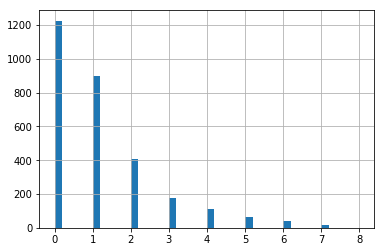

In [45]:
airbnb['Diff_fnl_review'].hist(bins=40)

In [46]:
airbnb.groupby('Diff_fnl_review')['id'].count()

Diff_fnl_review
0.0    1226
1.0     899
2.0     408
3.0     174
4.0     111
5.0      61
6.0      41
7.0      14
8.0       1
Name: id, dtype: int64

#As most of the instances fall under 0 category, that is first review and last review are in same year.
#Even if we impute the first and last review with host_since column(wherever NaN value), it will not make much sense. 
#Hence removing these columns

In [47]:
#Dropping these columns
airbnb.drop(['first_review','last_review', 'Diff_fnl_review'],axis=1, inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 2747 to 2738
Data columns (total 23 columns):
id                        3747 non-null int64
property_type             3747 non-null object
room_type                 3747 non-null object
accommodates              3747 non-null object
bathrooms                 3747 non-null int64
bed_type                  3747 non-null object
cancellation_policy       3747 non-null object
cleaning_fee              3747 non-null bool
city                      3747 non-null object
host_has_profile_pic      3747 non-null object
host_identity_verified    3747 non-null object
host_response_rate        2831 non-null object
host_since                3747 non-null object
instant_bookable          3747 non-null object
latitude                  3747 non-null float64
longitude                 3747 non-null float64
name                      3747 non-null object
neighbourhood             3397 non-null object
number_of_reviews         3747 non-null int64


In [48]:
#Distribution of 'host_has_profile_pic' column
airbnb.groupby('host_has_profile_pic')['id'].count()

host_has_profile_pic
f      11
t    3736
Name: id, dtype: int64

In [49]:
#As most of the lisitng has profile pic of the host, this attribute will not make much difference, so dropping it

In [50]:
#Dropping the column
airbnb.drop(['host_has_profile_pic'],axis=1, inplace=True)

In [51]:
#Distribution of 'host_identity_verified' column
airbnb.groupby('host_identity_verified')['id'].count()

host_identity_verified
f    1252
t    2495
Name: id, dtype: int64

In [52]:
#Converting to datetime format
airbnb['host_since']=pd.to_datetime(airbnb['host_since'])

In [53]:
#Checking the latest date
airbnb['host_since'].max()

Timestamp('2017-12-09 00:00:00')

#### Creating a new variable in number of years for time the host has started on airbnb 

In [54]:
airbnb['host_since_timeinyear']=2017 - airbnb['host_since'].dt.year

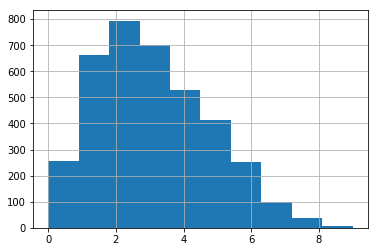

In [55]:
airbnb['host_since_timeinyear'].hist()

In [56]:
airbnb.groupby('host_since_timeinyear')['id'].count()

host_since_timeinyear
0    255
1    664
2    794
3    701
4    527
5    412
6    252
7     99
8     37
9      6
Name: id, dtype: int64

In [57]:
#Converting  host_since_timeinyear into 3 categories

In [58]:
#Creating the function
def hosttime(airbnb):
    if airbnb['host_since_timeinyear'] in [0]:
        return 'New_Host'
    elif airbnb['host_since_timeinyear'] in [1,2]:
        return '1-2 yrs'
    elif airbnb['host_since_timeinyear'] in [3,4]:
        return '3-4 yrs'
    else:
        return 'Greater than 4 yrs'

In [59]:
#Applying the funtion
airbnb['host_since_timeinyear'] = airbnb.apply(lambda airbnb:hosttime(airbnb), axis = 1)
airbnb.groupby('host_since_timeinyear')['id'].count()

host_since_timeinyear
1-2 yrs               1458
3-4 yrs               1228
Greater than 4 yrs     806
New_Host               255
Name: id, dtype: int64

In [60]:
#Dropping the original column
airbnb.drop(['host_since'], axis=1, inplace=True)

In [61]:
#Distribution of 'instant_bookable' column
airbnb.groupby('instant_bookable')['id'].count()

instant_bookable
f    2752
t     995
Name: id, dtype: int64

In [62]:
#Keeping the data at granular level to city, and dropping all the geo variables including the name.
airbnb.drop(['latitude', 'longitude', 'name', 'neighbourhood','zipcode'], axis=1, inplace=True)

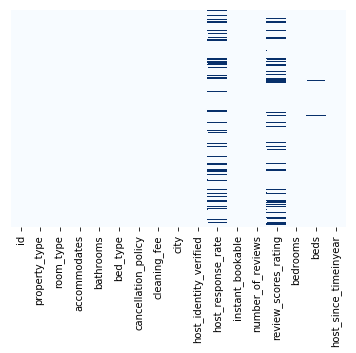

In [63]:
#Again visualizing the null values
sns.heatmap(airbnb.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [64]:
#Distribution of number of reviews as per city
airbnb.groupby('city')['number_of_reviews'].sum()

city
Boston      4442
Chicago     5503
DC          5548
LA         24694
NYC        29484
SF          9270
Name: number_of_reviews, dtype: int64

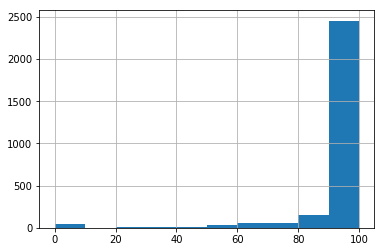

In [65]:
#Removing the % sign from the column and converting to float category
airbnb['host_response_rate'] = airbnb['host_response_rate'].str.replace(r'\D', '')
airbnb['host_response_rate'] = airbnb['host_response_rate'].astype(float)
airbnb['host_response_rate'].hist()

In [66]:
airbnb['host_response_rate'].describe()

count    2831.000000
mean       94.157188
std        16.698163
min         0.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: host_response_rate, dtype: float64

In [67]:
airbnb.groupby('host_response_rate')['id'].count()

host_response_rate
0.0        49
20.0        2
25.0        2
29.0        1
30.0        3
33.0       12
40.0        7
43.0        1
44.0        3
46.0        1
50.0       29
54.0        2
56.0        2
57.0        4
60.0       21
63.0        3
65.0        1
67.0       24
68.0        4
70.0       22
71.0        4
73.0        1
75.0       23
76.0        2
77.0        1
78.0        1
79.0        3
80.0       63
81.0        3
82.0       11
83.0       15
84.0        2
85.0        6
86.0       11
87.0        6
88.0       15
89.0       16
90.0      104
91.0        7
92.0       23
93.0       18
94.0       19
95.0       18
96.0       20
97.0       20
98.0       23
99.0       22
100.0    2181
Name: id, dtype: int64

In [68]:
#Replacing the host_response_rate with mean i.e 95 to be in the safe side. Eventhough median tends towards 100.
airbnb['host_response_rate']= airbnb['host_response_rate'].fillna(value=95.0)

In [69]:
#Distribution of 'review_scores_rating' column
airbnb.groupby('review_scores_rating')['id'].count()

review_scores_rating
20.0       1
40.0       9
50.0       1
57.0       1
60.0      20
63.0       1
64.0       1
66.0       1
67.0       3
70.0      10
72.0       4
73.0       6
74.0       3
75.0       6
76.0       5
77.0       7
78.0       6
79.0       4
80.0     122
81.0       7
82.0      14
83.0      18
84.0      23
85.0      31
86.0      29
87.0      57
88.0      53
89.0      68
90.0     152
91.0      69
92.0      97
93.0     174
94.0     119
95.0     192
96.0     189
97.0     192
98.0     253
99.0     119
100.0    820
Name: id, dtype: int64

count    2887.000000
mean       94.014894
std         7.628646
min        20.000000
25%        91.000000
50%        96.000000
75%       100.000000
max       100.000000
Name: review_scores_rating, dtype: float64

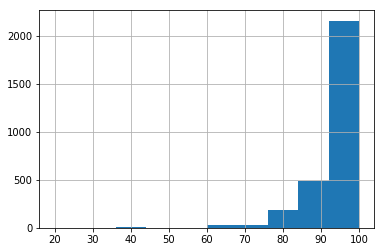

In [70]:
airbnb['review_scores_rating'].describe()
airbnb['review_scores_rating'].hist()

In [71]:
#Replacing the missing values with median=96
airbnb['review_scores_rating']= airbnb['review_scores_rating'].fillna(value=96.0)

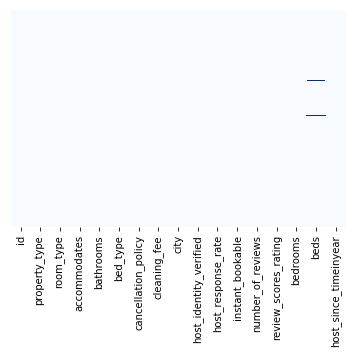

In [72]:
#Visualizing null values left
sns.heatmap(airbnb.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [73]:
#Distribution of beds column. And imputing for null values
airbnb['beds'].describe()
airbnb.groupby('bedrooms')['beds'].mean()

count    3639.000000
mean        1.709810
std         1.217153
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: beds, dtype: float64

bedrooms
0.0     1.292308
1.0     1.307442
2.0     2.416058
3.0     3.573529
4.0     4.833333
5.0     5.666667
6.0     7.166667
7.0     7.000000
8.0     8.000000
9.0    15.000000
Name: beds, dtype: float64

In [74]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 2747 to 2738
Data columns (total 17 columns):
id                        3747 non-null int64
property_type             3747 non-null object
room_type                 3747 non-null object
accommodates              3747 non-null object
bathrooms                 3747 non-null int64
bed_type                  3747 non-null object
cancellation_policy       3747 non-null object
cleaning_fee              3747 non-null bool
city                      3747 non-null object
host_identity_verified    3747 non-null object
host_response_rate        3747 non-null float64
instant_bookable          3747 non-null object
number_of_reviews         3747 non-null int64
review_scores_rating      3747 non-null float64
bedrooms                  3743 non-null float64
beds                      3639 non-null float64
host_since_timeinyear     3747 non-null object
dtypes: bool(1), float64(4), int64(3), object(9)
memory usage: 501.3+ KB


In [75]:
airbnb.groupby('bedrooms')['beds'].count()

bedrooms
0.0     325
1.0    2459
2.0     548
3.0     204
4.0      78
5.0      12
6.0       6
7.0       3
8.0       1
9.0       1
Name: beds, dtype: int64

In [76]:
#Creating a subset of the maindatset to understhan the distribution
d = {'property_type':airbnb['property_type'], 'room_type':airbnb['room_type'],'bedrooms':airbnb['bedrooms'],'beds':airbnb['beds']}
a= pd.DataFrame(data = d)
a.head()

,property_type,room_type,bedrooms,beds
2747,Other,Private room,1.0,1.0
3439,House,Entire home/apt,2.0,3.0
890,House,Private room,1.0,1.0
1782,Apartment,Entire home/apt,0.0,1.0
3995,Apartment,Entire home/apt,0.0,1.0


In [77]:
#Creating a subset for where only null values of bedrooms
df1 = a[a['bedrooms'].isnull()]
df1
pd.set_option('display.max_rows', None)

,property_type,room_type,bedrooms,beds
535,Apartment,Entire home/apt,NaN,NaN
1558,Apartment,Entire home/apt,NaN,1.0
4420,Apartment,Entire home/apt,NaN,1.0
3693,Other,Private room,NaN,NaN


In [78]:
#As per above, substituting bedrooms as 1 where missing value in the column, because 1 number of beds will be there in 1 bedroom
airbnb['bedrooms'] = airbnb['bedrooms'].fillna(value=1.0)

In [79]:
#Similarly creating the subset for beds
df2 = a[a['beds'].isnull()]
df2['bedrooms'].unique()
df2.info()

array([ 1.,  2., nan,  0.,  4.,  5.,  3.])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 979 to 545
Data columns (total 4 columns):
property_type    108 non-null object
room_type        108 non-null object
bedrooms         106 non-null float64
beds             0 non-null float64
dtypes: float64(2), object(2)
memory usage: 4.2+ KB


In [80]:
airbnb.groupby('bedrooms')['beds'].median()

bedrooms
0.0     1.0
1.0     1.0
2.0     2.0
3.0     3.0
4.0     4.0
5.0     6.0
6.0     7.0
7.0     7.0
8.0     8.0
9.0    15.0
Name: beds, dtype: float64

In [81]:
#As per the above, we can see that bedrooms 0,1,2,3,4,5 has 1,1,2,3,4,6 beds as median respectively. 
#So, for beds column, we are replacing null values with respective bedrooms number

In [82]:
#Creating a copy as a checkpoint
airbnb1 = airbnb.copy()
airbnb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 2747 to 2738
Data columns (total 17 columns):
id                        3747 non-null int64
property_type             3747 non-null object
room_type                 3747 non-null object
accommodates              3747 non-null object
bathrooms                 3747 non-null int64
bed_type                  3747 non-null object
cancellation_policy       3747 non-null object
cleaning_fee              3747 non-null bool
city                      3747 non-null object
host_identity_verified    3747 non-null object
host_response_rate        3747 non-null float64
instant_bookable          3747 non-null object
number_of_reviews         3747 non-null int64
review_scores_rating      3747 non-null float64
bedrooms                  3747 non-null float64
beds                      3639 non-null float64
host_since_timeinyear     3747 non-null object
dtypes: bool(1), float64(4), int64(3), object(9)
memory usage: 501.3+ KB


Creating function for imputing the number of beds and then applying it. Doing it step by step.

In [83]:
def beds(airbnb1):
    if np.isnan(airbnb1['beds']) and airbnb1['bedrooms']==0:
        return 1
    else:
        return airbnb1['beds']

In [84]:
airbnb1['beds'] = airbnb1.apply(lambda airbnb1:beds(airbnb1), axis = 1)

In [85]:
def beds(airbnb1):
    if np.isnan(airbnb1['beds']) and airbnb1['bedrooms']==1:
        return 1
    else:
        return airbnb1['beds']

In [86]:
airbnb1['beds'] = airbnb1.apply(lambda airbnb1:beds(airbnb1), axis = 1)

In [87]:
def beds(airbnb1):
    if np.isnan(airbnb1['beds']) and airbnb1['bedrooms']==2:
        return 2
    else:
        return airbnb1['beds']

In [88]:
airbnb1['beds'] = airbnb1.apply(lambda airbnb1:beds(airbnb1), axis = 1)

In [89]:
def beds(airbnb1):
    if np.isnan(airbnb1['beds']) and airbnb1['bedrooms']==3:
        return 3
    else:
        return airbnb1['beds']

In [90]:
airbnb1['beds'] = airbnb1.apply(lambda airbnb1:beds(airbnb1), axis = 1)

In [91]:
def beds(airbnb1):
    if np.isnan(airbnb1['beds']) and airbnb1['bedrooms']==4:
        return 4
    else:
        return airbnb1['beds']

In [92]:
airbnb1['beds'] = airbnb1.apply(lambda airbnb1:beds(airbnb1), axis = 1)

In [93]:
def beds(airbnb1):
    if np.isnan(airbnb1['beds']) and airbnb1['bedrooms']==5:
        return 6
    else:
        return airbnb1['beds']

In [94]:
airbnb1['beds'] = airbnb1.apply(lambda airbnb1:beds(airbnb1), axis = 1)

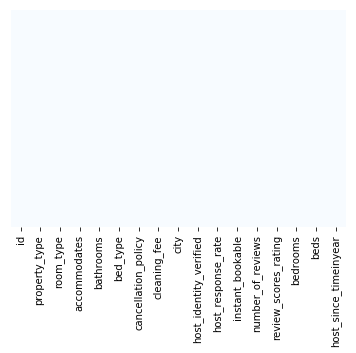

In [95]:
#Checking for null values
sns.heatmap(airbnb1.isnull(), yticklabels = False, cbar = False, cmap="Blues")

All null values are dealt with.

In [96]:
airbnb = airbnb1.copy()

In [97]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 2747 to 2738
Data columns (total 17 columns):
id                        3747 non-null int64
property_type             3747 non-null object
room_type                 3747 non-null object
accommodates              3747 non-null object
bathrooms                 3747 non-null int64
bed_type                  3747 non-null object
cancellation_policy       3747 non-null object
cleaning_fee              3747 non-null bool
city                      3747 non-null object
host_identity_verified    3747 non-null object
host_response_rate        3747 non-null float64
instant_bookable          3747 non-null object
number_of_reviews         3747 non-null int64
review_scores_rating      3747 non-null float64
bedrooms                  3747 non-null float64
beds                      3747 non-null float64
host_since_timeinyear     3747 non-null object
dtypes: bool(1), float64(4), int64(3), object(9)
memory usage: 501.3+ KB


## Now encoding the columns  and converting it into numerical form for running the model

In [98]:
airbnb.drop(['id'], axis=1, inplace= True)
airbnb.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,host_since_timeinyear
2747,Other,Private room,2,1,Real Bed,strict,True,LA,t,100.0,f,20,99.0,1.0,1.0,3-4 yrs
3439,House,Entire home/apt,Greater than 4,2,Real Bed,strict,True,LA,t,100.0,f,40,98.0,2.0,3.0,3-4 yrs
890,House,Private room,2,1,Real Bed,moderate,True,SF,t,100.0,f,111,99.0,1.0,1.0,Greater than 4 yrs
1782,Apartment,Entire home/apt,2,1,Real Bed,moderate,True,NYC,t,95.0,f,1,100.0,0.0,1.0,3-4 yrs
3995,Apartment,Entire home/apt,2,1,Real Bed,strict,True,NYC,t,80.0,f,45,97.0,0.0,1.0,Greater than 4 yrs


In [99]:
airbnb['property_type'].unique() #encoding
airbnb['room_type'].unique() #encoding
airbnb['accommodates'].unique() #mapping
airbnb['bathrooms'].unique() #mapping
airbnb['bed_type'].unique() #mapping
airbnb['cancellation_policy'].unique() #mapping

array(['Other', 'House', 'Apartment'], dtype=object)

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

array(['2', 'Greater than 4', '3-4', '1'], dtype=object)

array([1, 2], dtype=int64)

array(['Real Bed', 'Other'], dtype=object)

array(['strict', 'moderate', 'flexible'], dtype=object)

In [100]:
airbnb['cleaning_fee'].unique() #boolen no change needed
airbnb['city'].unique() # encoding
airbnb['host_identity_verified'].unique() #mapping
airbnb['host_response_rate'].unique() #convert % to 0.1 or something
airbnb['instant_bookable'].unique() #mapping
airbnb['number_of_reviews'].unique() #continous variable
airbnb['review_scores_rating'].unique() #convert % to number
airbnb['bedrooms'].unique() #mapping
airbnb['beds'].unique() # beds are ordinal mapping needed
airbnb['host_since_timeinyear'].unique() #mapping ordinal

array([ True, False])

array(['LA', 'SF', 'NYC', 'DC', 'Boston', 'Chicago'], dtype=object)

array(['t', 'f'], dtype=object)

array([100.,  95.,  80.,  91.,  70.,  75.,  99.,  90.,   0.,  89.,  97.,
        98.,  60.,  92.,  33.,  83.,  25.,  94.,  85.,  93.,  96.,  86.,
        29.,  82.,  88.,  87.,  50.,  79.,  30.,  43.,  63.,  67.,  68.,
        40.,  81.,  84.,  76.,  71.,  73.,  54.,  57.,  65.,  44.,  77.,
        56.,  78.,  20.,  46.])

array(['f', 't'], dtype=object)

array([ 20,  40, 111,   1,  45,   0,   2,   8,   5,  16, 138,  32,  29,
        14,  24,   9,  71,  90,   6,  18,  19,   4,  25,  23,   3,  67,
         7,  10,  64,  46,  21,  15,  60,  72,  11,  54,  69,  94,  59,
        13,  38,  43,  17, 137,  28,  22,  68, 175,  91,  34,  80,  27,
       119,  75,  36,  58, 104,  12, 123,  48,  41, 145,  26,  30,  85,
        84, 118,  37, 124, 133,  50, 303,  70, 106, 135,  31, 141,  57,
        51, 103,  47,  65, 525,  66, 107,  53, 164,  39, 173,  55,  44,
       280,  35,  78, 131, 149, 150,  61,  88, 125, 127, 128,  33,  76,
       193,  52,  49,  93, 262,  63, 110, 114, 226, 101,  83, 199, 113,
       211,  82, 162, 156,  56, 100, 269,  81, 126, 168, 158, 391,  87,
        77,  86,  99, 155, 146, 136, 134, 129,  74, 140,  42,  95, 207,
        62, 165, 112, 172, 192, 102, 159, 194,  96, 108, 171, 227, 358,
        98, 317, 120, 234,  73, 187, 271, 116, 184, 180,  79, 105, 318,
       170, 191, 144, 263, 217, 201,  97, 242, 214, 281, 236, 16

array([ 99.,  98., 100.,  97.,  96.,  95.,  92.,  94.,  90.,  93.,  89.,
        76.,  77.,  80.,  87.,  82.,  91.,  88.,  85.,  81.,  50.,  84.,
        86.,  20.,  70.,  64.,  60.,  40.,  83.,  75.,  73.,  79.,  57.,
        78.,  72.,  74.,  67.,  66.,  63.])

array([1., 2., 0., 3., 4., 5., 7., 6., 9., 8.])

array([ 1.,  3.,  2.,  4.,  6.,  5.,  9.,  7., 16.,  8., 10., 15., 12.,
        0.])

array(['3-4 yrs', 'Greater than 4 yrs', 'New_Host', '1-2 yrs'],
      dtype=object)

In [101]:
#Converting the columns in % form
airbnb['host_response_rate']=airbnb['host_response_rate']/100.00
airbnb['review_scores_rating']=airbnb['review_scores_rating']/100.00

# One hot encoding for columns "property_type" & "room_type"

In [102]:
airbnb =pd.get_dummies(airbnb,columns=['property_type','room_type','city'], prefix=['property_type','room_type','city'])

# Mappping for respective columns

In [103]:
airbnb['accommodates'].unique() #mapping
airbnb['accommodates'] = airbnb['accommodates'].map( {'1': 0, '2': 1, '3-4': 2, 'Greater than 4': 3} ).astype(int)
airbnb['bathrooms'].unique() #mapping
airbnb['bathrooms'] = airbnb['bathrooms'].map( {1: 0, 2: 1} ).astype(int)
airbnb['bed_type'].unique() #mapping
airbnb['bed_type'] = airbnb['bed_type'].map( {'Real Bed': 1, 'Other': 0} ).astype(int)
airbnb['cancellation_policy'].unique() #mapping
airbnb['cancellation_policy'] = airbnb['cancellation_policy'].map( {'flexible': 0, 'moderate': 1, 'strict':2} ).astype(int)
airbnb['instant_bookable'].unique() #mapping
airbnb['instant_bookable'] = airbnb['instant_bookable'].map( {'t': 1, 'f': 0} ).astype(int)
airbnb['host_since_timeinyear'].unique() #mapping
airbnb['host_since_timeinyear'] = airbnb['host_since_timeinyear'].map( {'New_Host': 0, '1-2 yrs': 1, '3-4 yrs': 2, 'Greater than 4 yrs': 3} ).astype(int)
airbnb['host_identity_verified'].unique() #mapping
airbnb['host_identity_verified'] = airbnb['host_identity_verified'].map( {'t': 1, 'f': 0} ).astype(int)
airbnb['bedrooms'].unique() #mapping
airbnb['bedrooms'] = airbnb['bedrooms'].map( {0: 0, 1: 1, 2: 2, 3: 3, 4: 4,5: 5, 6: 6, 7: 7, 8: 8, 9: 9} ).astype(int)

array(['2', 'Greater than 4', '3-4', '1'], dtype=object)

array([1, 2], dtype=int64)

array(['Real Bed', 'Other'], dtype=object)

array(['strict', 'moderate', 'flexible'], dtype=object)

array(['f', 't'], dtype=object)

array(['3-4 yrs', 'Greater than 4 yrs', 'New_Host', '1-2 yrs'],
      dtype=object)

array(['t', 'f'], dtype=object)

array([1., 2., 0., 3., 4., 5., 7., 6., 9., 8.])

In [104]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 2747 to 2738
Data columns (total 25 columns):
accommodates                 3747 non-null int32
bathrooms                    3747 non-null int32
bed_type                     3747 non-null int32
cancellation_policy          3747 non-null int32
cleaning_fee                 3747 non-null bool
host_identity_verified       3747 non-null int32
host_response_rate           3747 non-null float64
instant_bookable             3747 non-null int32
number_of_reviews            3747 non-null int64
review_scores_rating         3747 non-null float64
bedrooms                     3747 non-null int32
beds                         3747 non-null float64
host_since_timeinyear        3747 non-null int32
property_type_Apartment      3747 non-null uint8
property_type_House          3747 non-null uint8
property_type_Other          3747 non-null uint8
room_type_Entire home/apt    3747 non-null uint8
room_type_Private room       3747 non-null uint8
roo

# The train set is prepared. Now all the above code is run for test dataset 
# to be on the same page while testing our models. 

In [105]:
#Creating the copy for test set
airbnb_test=X_test_org.copy()

In [106]:
#Property column has many categories. Following is the distribution of the Property column
airbnb_test.groupby('property_type')['id'].count()

property_type
Apartment          636
Bed & Breakfast      8
Boutique hotel       1
Bungalow             4
Camper/RV            1
Condominium         28
Dorm                 1
Guest suite          1
Guesthouse           3
Hostel               1
House              196
In-law               2
Loft                15
Other                8
Timeshare            2
Townhouse           29
Vacation home        1
Name: id, dtype: int64

#As most of the instances fall under Apartment, House category. So creating 3 categories for the Property_type column

In [107]:
#Defining the function
def conv(airbnb_test):
    if airbnb_test['property_type'] in ['Apartment', 'House', 'Other']:
        return airbnb_test['property_type']
    else:
        return 'Other'

In [108]:
#Applying the function
airbnb_test['property_type'] = airbnb_test.apply(lambda airbnb_test:conv(airbnb_test), axis = 1)
airbnb_test['property_type'].unique()

array(['Apartment', 'House', 'Other'], dtype=object)

In [109]:
#Room_type column
airbnb_test.groupby('room_type')['id'].count()

room_type
Entire home/apt    536
Private room       369
Shared room         32
Name: id, dtype: int64

In [110]:
#Amenities column has text type data. Hence dropping the column. 
airbnb_test.drop(['amenities'], axis=1, inplace=True)

In [111]:
#Accomodates column. As it has discreet values, creating bins and converting the column to categorical variable.
airbnb_test.groupby('accommodates')['id'].count()

accommodates
1     115
2     386
3     106
4     137
5      53
6      76
7      10
8      30
9       2
10     10
11      3
14      1
16      8
Name: id, dtype: int64

In [112]:
#Defining the function
def conv(airbnb_test):
    if airbnb_test['accommodates']==1:
        return '1'
    elif airbnb_test['accommodates']==2:
        return '2'
    elif airbnb_test['accommodates'] in (3,4):
        return '3-4'
    else:
        return 'Greater than 4'

In [113]:
#Applying the function
airbnb_test['accommodates'] = airbnb_test.apply(lambda airbnb_test:conv(airbnb_test), axis = 1)
airbnb_test.groupby('accommodates')['id'].count()

accommodates
1                 115
2                 386
3-4               243
Greater than 4    193
Name: id, dtype: int64

In [114]:
#Bathrooms column. As it has discreet values, creating bins and converting the column to categorical variable.

In [115]:
airbnb_test.groupby('bathrooms')['id'].count()

bathrooms
0.0      2
0.5      4
1.0    703
1.5     50
2.0     96
2.5     19
3.0     17
3.5      2
4.0      6
4.5      1
5.5      1
7.0      1
8.0      1
Name: id, dtype: int64

In [116]:
#As the bathroom columns has missing values, Using accomodates and bathrooms column and using that distribution 
# for imputing in the bathrooms column. 
airbnb_test.groupby('accommodates')['bathrooms'].median()

accommodates
1                 1.0
2                 1.0
3-4               1.0
Greater than 4    1.5
Name: bathrooms, dtype: float64

In [117]:
#Using median, as it gives exact number rather than mean, because 1.15 bathroom won't mean anything.

In [118]:
def impute(airbnb_test):
    if airbnb_test['accommodates'] in (['1','2','3-4']):
        return 1
    else:
        return 2

In [119]:
airbnb_test['bathrooms'] = airbnb_test.apply(lambda airbnb_test:impute(airbnb_test), axis = 1)
airbnb_test.groupby('bathrooms')['id'].count()

bathrooms
1    744
2    193
Name: id, dtype: int64

In [120]:
#Similarly for bed_type column

In [121]:
airbnb_test.groupby('bed_type')['id'].count()

bed_type
Airbed             9
Couch              2
Futon             10
Pull-out Sofa      6
Real Bed         910
Name: id, dtype: int64

In [122]:
def conv(airbnb_test):
    if airbnb_test['bed_type'] in ['Real Bed']:
        return airbnb_test['bed_type']
    else:
        return 'Other'


In [123]:
airbnb_test['bed_type'] = airbnb_test.apply(lambda airbnb_test:conv(airbnb_test), axis = 1)
airbnb_test.groupby('bed_type')['id'].count()

bed_type
Other        27
Real Bed    910
Name: id, dtype: int64

In [124]:
#Reducing categories for cancellation_policy column

In [125]:
airbnb_test.groupby('cancellation_policy')['id'].count()

cancellation_policy
flexible           325
moderate           213
strict             398
super_strict_30      1
Name: id, dtype: int64

In [126]:
def conv(airbnb_test):
    if airbnb_test['cancellation_policy'] in ['flexible', 'strict', 'moderate']:
        return airbnb_test['cancellation_policy']
    else:
        return 'strict'

In [127]:
airbnb_test['cancellation_policy'] = airbnb_test.apply(lambda airbnb_test:conv(airbnb_test), axis = 1)
airbnb_test.groupby('cancellation_policy')['id'].count()

cancellation_policy
flexible    325
moderate    213
strict      399
Name: id, dtype: int64

In [128]:
#Checking cleaning_fee column
airbnb_test.groupby('cleaning_fee')['id'].count()

cleaning_fee
False    261
True     676
Name: id, dtype: int64

In [129]:
#Distribution of City column
airbnb_test.groupby('city')['id'].count()

city
Boston      39
Chicago     49
DC          78
LA         281
NYC        405
SF          85
Name: id, dtype: int64

In [130]:
#First_review and Last_review column has lot of missing values. Dealing with them. 
#Converting them to datetime format.

In [131]:
airbnb_test['first_review'] = pd.to_datetime(airbnb_test['first_review'])

In [132]:
airbnb_test['last_review'] = pd.to_datetime(airbnb_test['last_review'])

In [133]:
#Creating a new variable to understand the difference between first and last reviews
airbnb_test['Diff_fnl_review']= airbnb_test['last_review'].dt.year - airbnb_test['first_review'].dt.year

In [134]:
airbnb_test['Diff_fnl_review'].unique()

array([ 3.,  0., nan,  1.,  2.,  5.,  7.,  4.,  6.])

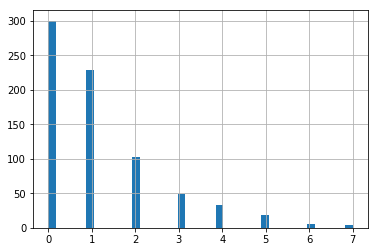

In [135]:
airbnb_test['Diff_fnl_review'].hist(bins=40)

In [136]:
airbnb_test.groupby('Diff_fnl_review')['id'].count()

Diff_fnl_review
0.0    300
1.0    229
2.0    103
3.0     49
4.0     33
5.0     18
6.0      5
7.0      4
Name: id, dtype: int64

#As most of the instances fall under 0 category, that is first review and last review are in same year.
#Even if we impute the first and last review with host_since column(wherever NaN value), it will not make much sense. 
#Hence removing these columns

In [137]:
#Dropping these columns
airbnb_test.drop(['first_review','last_review', 'Diff_fnl_review'],axis=1, inplace=True)
airbnb_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 1198 to 2209
Data columns (total 23 columns):
id                        937 non-null int64
property_type             937 non-null object
room_type                 937 non-null object
accommodates              937 non-null object
bathrooms                 937 non-null int64
bed_type                  937 non-null object
cancellation_policy       937 non-null object
cleaning_fee              937 non-null bool
city                      937 non-null object
host_has_profile_pic      937 non-null object
host_identity_verified    937 non-null object
host_response_rate        703 non-null object
host_since                937 non-null object
instant_bookable          937 non-null object
latitude                  937 non-null float64
longitude                 937 non-null float64
name                      937 non-null object
neighbourhood             862 non-null object
number_of_reviews         937 non-null int64
review_scores_rating

In [138]:
#Distribution of 'host_has_profile_pic' column
airbnb_test.groupby('host_has_profile_pic')['id'].count()

host_has_profile_pic
f      3
t    934
Name: id, dtype: int64

In [139]:
#As most of the lisitng has profile pic of the host, this attribute will not make much difference, so dropping it

In [140]:
#Dropping the column
airbnb_test.drop(['host_has_profile_pic'],axis=1, inplace=True)

In [141]:
#Distribution of 'host_identity_verified' column
airbnb_test.groupby('host_identity_verified')['id'].count()

host_identity_verified
f    299
t    638
Name: id, dtype: int64

In [142]:
#Converting to datetime format
airbnb_test['host_since']=pd.to_datetime(airbnb_test['host_since'])

In [143]:
#Checking the latest date
airbnb_test['host_since'].max()

Timestamp('2017-12-07 00:00:00')

#### Creating a new variable in number of years for time the host has started on airbnb_test 

In [144]:
airbnb_test['host_since_timeinyear']=2017 - airbnb_test['host_since'].dt.year

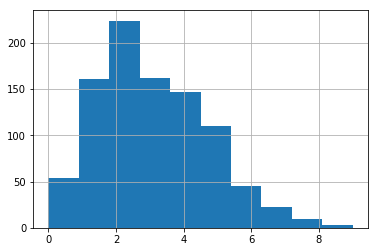

In [145]:
airbnb_test['host_since_timeinyear'].hist()

In [146]:
airbnb_test.groupby('host_since_timeinyear')['id'].count()

host_since_timeinyear
0     54
1    161
2    224
3    162
4    147
5    110
6     45
7     22
8      9
9      3
Name: id, dtype: int64

In [147]:
#Converting  host_since_timeinyear into 3 categories

In [148]:
#Creating the function
def hosttime(airbnb_test):
    if airbnb_test['host_since_timeinyear'] in [0]:
        return 'New_Host'
    elif airbnb_test['host_since_timeinyear'] in [1,2]:
        return '1-2 yrs'
    elif airbnb_test['host_since_timeinyear'] in [3,4]:
        return '3-4 yrs'
    else:
        return 'Greater than 4 yrs'

In [149]:
#Applying the funtion
airbnb_test['host_since_timeinyear'] = airbnb_test.apply(lambda airbnb_test:hosttime(airbnb_test), axis = 1)
airbnb_test.groupby('host_since_timeinyear')['id'].count()

host_since_timeinyear
1-2 yrs               385
3-4 yrs               309
Greater than 4 yrs    189
New_Host               54
Name: id, dtype: int64

In [150]:
#Dropping the original column
airbnb_test.drop(['host_since'], axis=1, inplace=True)

In [151]:
#Distribution of 'instant_bookable' column
airbnb_test.groupby('instant_bookable')['id'].count()

instant_bookable
f    685
t    252
Name: id, dtype: int64

In [152]:
#Keeping the data at granular level to city, and dropping all the geo variables including the name.
airbnb_test.drop(['latitude', 'longitude', 'name', 'neighbourhood','zipcode'], axis=1, inplace=True)

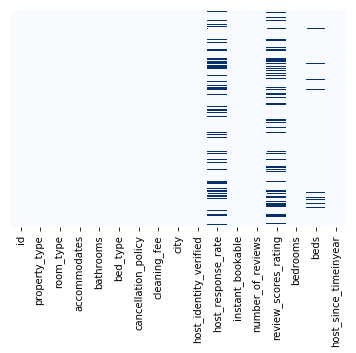

In [153]:
#Again visualizing the null values
sns.heatmap(airbnb_test.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [154]:
#Distribution of number of reviews as per city
airbnb_test.groupby('city')['number_of_reviews'].sum()

city
Boston     1046
Chicago    1135
DC         1834
LA         6462
NYC        6823
SF         2903
Name: number_of_reviews, dtype: int64

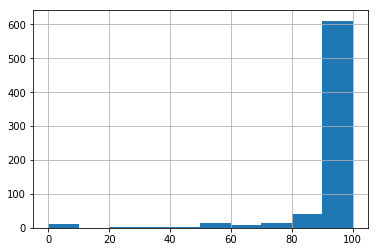

In [155]:
#Removing the % sign from the column and converting to float category
airbnb_test['host_response_rate'] = airbnb_test['host_response_rate'].str.replace(r'\D', '')
airbnb_test['host_response_rate'] = airbnb_test['host_response_rate'].astype(float)
airbnb_test['host_response_rate'].hist()

In [156]:
airbnb_test['host_response_rate'].describe()

count    703.000000
mean      94.456615
std       16.065590
min        0.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: host_response_rate, dtype: float64

In [157]:
airbnb_test.groupby('host_response_rate')['id'].count()

host_response_rate
0.0       11
25.0       1
33.0       3
40.0       1
50.0      12
54.0       1
57.0       1
60.0       2
64.0       1
67.0       3
68.0       1
70.0      10
71.0       1
75.0       2
78.0       2
80.0      18
81.0       1
83.0       5
84.0       1
85.0       1
86.0       5
88.0       4
89.0       5
90.0      25
91.0       3
92.0       5
93.0       2
94.0      10
95.0       1
96.0       2
97.0       3
98.0       7
99.0       7
100.0    546
Name: id, dtype: int64

In [158]:
#Replacing the host_response_rate with mean i.e 95 to be in the safe side. Eventhough median tends towards 100.
airbnb_test['host_response_rate']= airbnb_test['host_response_rate'].fillna(value=95.0)

In [159]:
#Distribution of 'review_scores_rating' column
airbnb_test.groupby('review_scores_rating')['id'].count()

review_scores_rating
20.0       2
40.0       1
55.0       1
60.0       5
70.0       4
73.0       4
78.0       1
79.0       1
80.0      29
81.0       3
82.0       5
83.0       6
84.0       6
85.0      11
86.0       6
87.0       5
88.0      17
89.0      21
90.0      40
91.0      26
92.0      24
93.0      47
94.0      25
95.0      52
96.0      51
97.0      50
98.0      45
99.0      38
100.0    202
Name: id, dtype: int64

count    728.000000
mean      93.877747
std        8.063206
min       20.000000
25%       91.000000
50%       96.000000
75%      100.000000
max      100.000000
Name: review_scores_rating, dtype: float64

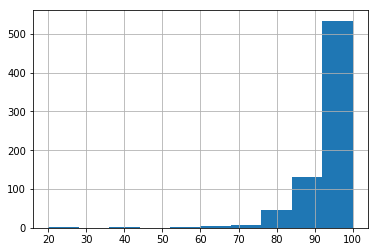

In [160]:
airbnb_test['review_scores_rating'].describe()
airbnb_test['review_scores_rating'].hist()

In [161]:
#Replacing the missing values with median=96
airbnb_test['review_scores_rating']= airbnb_test['review_scores_rating'].fillna(value=96.0)

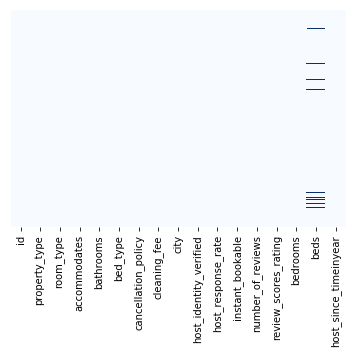

In [162]:
#Visualizing null values left
sns.heatmap(airbnb_test.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [163]:
#Distribution of beds column. And imputing for null values
airbnb_test['beds'].describe()
airbnb_test.groupby('bedrooms')['beds'].mean()

count    913.000000
mean       1.763417
std        1.285418
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       13.000000
Name: beds, dtype: float64

bedrooms
0.0    1.226190
1.0    1.267462
2.0    2.539877
3.0    3.833333
4.0    4.722222
5.0    7.000000
6.0    9.666667
Name: beds, dtype: float64

In [164]:
airbnb_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 1198 to 2209
Data columns (total 17 columns):
id                        937 non-null int64
property_type             937 non-null object
room_type                 937 non-null object
accommodates              937 non-null object
bathrooms                 937 non-null int64
bed_type                  937 non-null object
cancellation_policy       937 non-null object
cleaning_fee              937 non-null bool
city                      937 non-null object
host_identity_verified    937 non-null object
host_response_rate        937 non-null float64
instant_bookable          937 non-null object
number_of_reviews         937 non-null int64
review_scores_rating      937 non-null float64
bedrooms                  937 non-null float64
beds                      913 non-null float64
host_since_timeinyear     937 non-null object
dtypes: bool(1), float64(4), int64(3), object(9)
memory usage: 125.4+ KB


In [165]:
airbnb_test.groupby('bedrooms')['beds'].count()

bedrooms
0.0     84
1.0    587
2.0    163
3.0     54
4.0     18
5.0      4
6.0      3
Name: beds, dtype: int64

In [166]:
#Creating a subset of the maindatset to understhan the distribution
d = {'property_type':airbnb_test['property_type'], 'room_type':airbnb_test['room_type'],'bedrooms':airbnb_test['bedrooms'],'beds':airbnb_test['beds']}
a= pd.DataFrame(data = d)
a.head()

,property_type,room_type,bedrooms,beds
1198,Apartment,Private room,1.0,1.0
2183,House,Entire home/apt,4.0,5.0
3742,Apartment,Private room,1.0,1.0
1834,House,Entire home/apt,3.0,3.0
4000,Apartment,Entire home/apt,4.0,8.0


In [167]:
#Creating a subset for where only null values of bedrooms
df1 = a[a['bedrooms'].isnull()]
df1
pd.set_option('display.max_rows', None)

,property_type,room_type,bedrooms,beds


In [168]:
#As per above, substituting bedrooms as 1 where missing value in the column, because 1 number of beds will be there in 1 bedroom
airbnb_test['bedrooms'] = airbnb_test['bedrooms'].fillna(value=1.0)

In [169]:
#Similarly creating the subset for beds
df2 = a[a['beds'].isnull()]
df2['bedrooms'].unique()
df2.info()

array([2., 1., 0., 3.])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 2153 to 1097
Data columns (total 4 columns):
property_type    24 non-null object
room_type        24 non-null object
bedrooms         24 non-null float64
beds             0 non-null float64
dtypes: float64(2), object(2)
memory usage: 960.0+ bytes


In [170]:
airbnb_test.groupby('bedrooms')['beds'].median()

bedrooms
0.0    1.0
1.0    1.0
2.0    2.0
3.0    3.0
4.0    4.5
5.0    6.5
6.0    8.0
Name: beds, dtype: float64

In [171]:
#As per the above, we can see that bedrooms 0,1,2,3,4,5 has 1,1,2,3,4,6 beds as median respectively. 
#So, for beds column, we are replacing null values with respective bedrooms number

In [172]:
#Creating a copy as a checkpoint
airbnb_test1 = airbnb_test.copy()
airbnb_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 1198 to 2209
Data columns (total 17 columns):
id                        937 non-null int64
property_type             937 non-null object
room_type                 937 non-null object
accommodates              937 non-null object
bathrooms                 937 non-null int64
bed_type                  937 non-null object
cancellation_policy       937 non-null object
cleaning_fee              937 non-null bool
city                      937 non-null object
host_identity_verified    937 non-null object
host_response_rate        937 non-null float64
instant_bookable          937 non-null object
number_of_reviews         937 non-null int64
review_scores_rating      937 non-null float64
bedrooms                  937 non-null float64
beds                      913 non-null float64
host_since_timeinyear     937 non-null object
dtypes: bool(1), float64(4), int64(3), object(9)
memory usage: 125.4+ KB


Creating function for imputing the number of beds and then applying it. Doing it step by step.

In [173]:
def beds(airbnb_test1):
    if np.isnan(airbnb_test1['beds']) and airbnb_test1['bedrooms']==0:
        return 1
    else:
        return airbnb_test1['beds']

In [174]:
airbnb_test1['beds'] = airbnb_test1.apply(lambda airbnb_test1:beds(airbnb_test1), axis = 1)

In [175]:
def beds(airbnb_test1):
    if np.isnan(airbnb_test1['beds']) and airbnb_test1['bedrooms']==1:
        return 1
    else:
        return airbnb_test1['beds']

In [176]:
airbnb_test1['beds'] = airbnb_test1.apply(lambda airbnb_test1:beds(airbnb_test1), axis = 1)

In [177]:
def beds(airbnb_test1):
    if np.isnan(airbnb_test1['beds']) and airbnb_test1['bedrooms']==2:
        return 2
    else:
        return airbnb_test1['beds']

In [178]:
airbnb_test1['beds'] = airbnb_test1.apply(lambda airbnb_test1:beds(airbnb_test1), axis = 1)

In [179]:
def beds(airbnb_test1):
    if np.isnan(airbnb_test1['beds']) and airbnb_test1['bedrooms']==3:
        return 3
    else:
        return airbnb_test1['beds']

In [180]:
airbnb_test1['beds'] = airbnb_test1.apply(lambda airbnb_test1:beds(airbnb_test1), axis = 1)

In [181]:
def beds(airbnb_test1):
    if np.isnan(airbnb_test1['beds']) and airbnb_test1['bedrooms']==4:
        return 4
    else:
        return airbnb_test1['beds']

In [182]:
airbnb_test1['beds'] = airbnb_test1.apply(lambda airbnb_test1:beds(airbnb_test1), axis = 1)

In [183]:
def beds(airbnb_test1):
    if np.isnan(airbnb_test1['beds']) and airbnb_test1['bedrooms']==5:
        return 6
    else:
        return airbnb_test1['beds']

In [184]:
airbnb_test1['beds'] = airbnb_test1.apply(lambda airbnb_test1:beds(airbnb_test1), axis = 1)

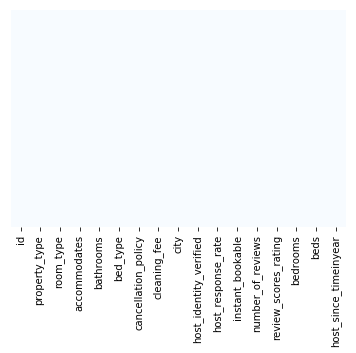

In [185]:
#Checking for null values
sns.heatmap(airbnb_test1.isnull(), yticklabels = False, cbar = False, cmap="Blues")

All null values are dealt with.

In [186]:
airbnb_test = airbnb_test1.copy()

In [187]:
airbnb_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 1198 to 2209
Data columns (total 17 columns):
id                        937 non-null int64
property_type             937 non-null object
room_type                 937 non-null object
accommodates              937 non-null object
bathrooms                 937 non-null int64
bed_type                  937 non-null object
cancellation_policy       937 non-null object
cleaning_fee              937 non-null bool
city                      937 non-null object
host_identity_verified    937 non-null object
host_response_rate        937 non-null float64
instant_bookable          937 non-null object
number_of_reviews         937 non-null int64
review_scores_rating      937 non-null float64
bedrooms                  937 non-null float64
beds                      937 non-null float64
host_since_timeinyear     937 non-null object
dtypes: bool(1), float64(4), int64(3), object(9)
memory usage: 125.4+ KB


## Now encoding the columns  and converting it into numerical form for running the model

In [188]:
airbnb_test.drop(['id'], axis=1, inplace= True)
airbnb_test.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,host_since_timeinyear
1198,Apartment,Private room,1,1,Real Bed,strict,False,Boston,t,100.0,f,26,96.0,1.0,1.0,Greater than 4 yrs
2183,House,Entire home/apt,Greater than 4,2,Real Bed,strict,True,LA,t,96.0,f,5,80.0,4.0,5.0,3-4 yrs
3742,Apartment,Private room,1,1,Other,moderate,False,NYC,f,95.0,f,0,96.0,1.0,1.0,1-2 yrs
1834,House,Entire home/apt,3-4,1,Real Bed,flexible,False,NYC,t,95.0,f,2,90.0,3.0,3.0,Greater than 4 yrs
4000,Apartment,Entire home/apt,Greater than 4,2,Real Bed,strict,True,Chicago,t,98.0,t,16,91.0,4.0,8.0,Greater than 4 yrs


In [189]:
airbnb_test['property_type'].unique() #encoding
airbnb_test['room_type'].unique() #encoding
airbnb_test['accommodates'].unique() #mapping
airbnb_test['bathrooms'].unique() #mapping
airbnb_test['bed_type'].unique() #mapping
airbnb_test['cancellation_policy'].unique() #mapping

array(['Apartment', 'House', 'Other'], dtype=object)

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

array(['1', 'Greater than 4', '3-4', '2'], dtype=object)

array([1, 2], dtype=int64)

array(['Real Bed', 'Other'], dtype=object)

array(['strict', 'moderate', 'flexible'], dtype=object)

In [190]:
airbnb_test['cleaning_fee'].unique() #boolen no change needed
airbnb_test['city'].unique() # encoding
airbnb_test['host_identity_verified'].unique() #mapping
airbnb_test['host_response_rate'].unique() #convert % to 0.1 or something
airbnb_test['instant_bookable'].unique() #mapping
airbnb_test['number_of_reviews'].unique() #continous variable
airbnb_test['review_scores_rating'].unique() #convert % to number
airbnb_test['bedrooms'].unique() #mapping
airbnb_test['beds'].unique() # beds are ordinal mapping needed
airbnb_test['host_since_timeinyear'].unique() #mapping ordinal

array([False,  True])

array(['Boston', 'LA', 'NYC', 'Chicago', 'SF', 'DC'], dtype=object)

array(['t', 'f'], dtype=object)

array([100.,  96.,  95.,  98.,  80.,  86.,  33.,  90.,  88.,  75.,  68.,
        83.,  99.,  70.,  92.,  94.,  91.,  54.,  97.,  71.,  57.,  50.,
        81.,  67.,   0.,  93.,  89.,  40.,  78.,  84.,  60.,  64.,  25.,
        85.])

array(['f', 't'], dtype=object)

array([ 26,   5,   0,   2,  16,   1,   6,  18,  43,  73, 168,  99,   3,
         9, 159,  13,  29,  60, 111,  45,  12,  37,  67,  39,  61,  20,
        11,  46,  14,   4,  25,  92,   8,  15, 178,  24,   7, 124,  30,
        96, 112,  36,  57, 226,  19,  59, 176,  22,  28,  38,  35, 138,
        64,  55, 145,  23, 170,  53, 469,  89, 113,  41,  40,  10,  31,
        80,  21, 153, 212,  33,  42,  56,  68,  65, 155,  85,  34,  52,
        17,  51,  76, 166, 104, 131,  70,  44,  81, 133, 142,  32, 107,
        82, 161,  50,  91,  74,  69,  63,  88, 122, 101, 339, 118,  27,
        71,  47, 172, 151,  78, 148, 152, 116, 137, 264, 236, 143, 117,
        49,  77, 110,  94, 218, 106, 186], dtype=int64)

array([ 96.,  80.,  90.,  91., 100.,  97.,  99.,  98.,  95.,  89.,  94.,
        93.,  82.,  88.,  70.,  87.,  73.,  92.,  81.,  83.,  60.,  55.,
        79.,  78.,  85.,  84.,  20.,  86.,  40.])

array([1., 4., 3., 0., 2., 6., 5.])

array([ 1.,  5.,  3.,  8.,  2.,  6.,  4.,  7., 13., 10.])

array(['Greater than 4 yrs', '3-4 yrs', '1-2 yrs', 'New_Host'],
      dtype=object)

In [191]:
#Converting the columns in % form
airbnb_test['host_response_rate']=airbnb_test['host_response_rate']/100.00
airbnb_test['review_scores_rating']=airbnb_test['review_scores_rating']/100.00

# One hot encoding for columns "property_type" & "room_type"

In [192]:
airbnb_test =pd.get_dummies(airbnb_test,columns=['property_type','room_type','city'], prefix=['property_type','room_type','city'])

# Mappping for respective columns

In [193]:
airbnb_test['accommodates'].unique() #mapping
airbnb_test['accommodates'] = airbnb_test['accommodates'].map( {'1': 0, '2': 1, '3-4': 2, 'Greater than 4': 3} ).astype(int)
airbnb_test['bathrooms'].unique() #mapping
airbnb_test['bathrooms'] = airbnb_test['bathrooms'].map( {1: 0, 2: 1} ).astype(int)
airbnb_test['bed_type'].unique() #mapping
airbnb_test['bed_type'] = airbnb_test['bed_type'].map( {'Real Bed': 1, 'Other': 0} ).astype(int)
airbnb_test['cancellation_policy'].unique() #mapping
airbnb_test['cancellation_policy'] = airbnb_test['cancellation_policy'].map( {'flexible': 0, 'moderate': 1, 'strict':2} ).astype(int)
airbnb_test['instant_bookable'].unique() #mapping
airbnb_test['instant_bookable'] = airbnb_test['instant_bookable'].map( {'t': 1, 'f': 0} ).astype(int)
airbnb_test['host_since_timeinyear'].unique() #mapping
airbnb_test['host_since_timeinyear'] = airbnb_test['host_since_timeinyear'].map( {'New_Host': 0, '1-2 yrs': 1, '3-4 yrs': 2, 'Greater than 4 yrs': 3} ).astype(int)
airbnb_test['host_identity_verified'].unique() #mapping
airbnb_test['host_identity_verified'] = airbnb_test['host_identity_verified'].map( {'t': 1, 'f': 0} ).astype(int)
airbnb_test['bedrooms'].unique() #mapping
airbnb_test['bedrooms'] = airbnb_test['bedrooms'].map( {0: 0, 1: 1, 2: 2, 3: 3, 4: 4,5: 5, 6: 6, 7: 7, 8: 8, 9: 9} ).astype(int)

array(['1', 'Greater than 4', '3-4', '2'], dtype=object)

array([1, 2], dtype=int64)

array(['Real Bed', 'Other'], dtype=object)

array(['strict', 'moderate', 'flexible'], dtype=object)

array(['f', 't'], dtype=object)

array(['Greater than 4 yrs', '3-4 yrs', '1-2 yrs', 'New_Host'],
      dtype=object)

array(['t', 'f'], dtype=object)

array([1., 4., 3., 0., 2., 6., 5.])

In [194]:
airbnb_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 1198 to 2209
Data columns (total 25 columns):
accommodates                 937 non-null int32
bathrooms                    937 non-null int32
bed_type                     937 non-null int32
cancellation_policy          937 non-null int32
cleaning_fee                 937 non-null bool
host_identity_verified       937 non-null int32
host_response_rate           937 non-null float64
instant_bookable             937 non-null int32
number_of_reviews            937 non-null int64
review_scores_rating         937 non-null float64
bedrooms                     937 non-null int32
beds                         937 non-null float64
host_since_timeinyear        937 non-null int32
property_type_Apartment      937 non-null uint8
property_type_House          937 non-null uint8
property_type_Other          937 non-null uint8
room_type_Entire home/apt    937 non-null uint8
room_type_Private room       937 non-null uint8
room_type_Shared room 

### Applying MinMaxScaling techniques produces values of range [0,1]. Our dataset has features with hard boundaries.  It does not have outliers

In [195]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(airbnb)
X_test = scaler.transform(airbnb_test)

In [196]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3747, 25), (3747,), (937, 25), (937,))

# Regression by Bagging and Pasting

In [197]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [201]:
#Cross-Validation
scores = cross_val_score(KNeighborsRegressor(n_neighbors=19), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(KNeighborsRegressor(n_neighbors=19), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.24348903 -0.26001758 -0.20811714 -0.23525382 -0.26378677 -0.2265077
 -0.23943634 -0.28099581 -0.2677318  -0.25759205]
Average cross-validation score: -0.25
rmse score: 0.50
Cross-validation scores: [-0.22915976 -0.27982266 -0.21816071 -0.24068476 -0.35470755 -0.21227562
 -0.28779538 -0.23957262 -0.25408789 -0.22886975]
Average cross-validation score: -0.25
rmse score: 0.50


In [202]:
# accuracy for best fit KNNRegressor
knn = KNeighborsRegressor(n_neighbors=19)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform')

0.5639099917464292
0.5128551123558116


RMSE for both train and test is 0.5

## KNN with Bagging

In [203]:
# Grid search for KNN for bagging hyperparameters

grid = {"max_samples": [50, 100,150, 200],
                          "n_estimators": [100,200,400,500],
                          "bootstrap": [True]}

grid_search = GridSearchCV(BaggingRegressor(KNeighborsRegressor(n_neighbors=19), random_state=0), grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                           leaf_size=30,
                                                                           metric='minkowski',
                                                                           metric_params=None,
                                                                           n_jobs=None,
                                                                           n_neighbors=19,
                                                                           p=2,
                                                                           weights='uniform'),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                        

Best parameters: {'bootstrap': True, 'max_samples': 200, 'n_estimators': 400}
Best cross-validation score: 0.46


In [204]:
# Cross validation
knn = KNeighborsRegressor(n_neighbors=19)

scores = cross_val_score(BaggingRegressor(knn, n_estimators=400, max_samples=200, bootstrap=True, random_state=0), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(BaggingRegressor(knn, n_estimators=400, max_samples=200, bootstrap=True, random_state=0), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.26627965 -0.29161095 -0.24269564 -0.28248826 -0.29875373 -0.22742579
 -0.25147205 -0.30227428 -0.29379821 -0.30418105]
Average cross-validation score: -0.28
rmse score: 0.53
Cross-validation scores: [-0.27006332 -0.27318764 -0.24993761 -0.25032718 -0.33920738 -0.23266737
 -0.31309264 -0.26174194 -0.30581843 -0.25034944]
Average cross-validation score: -0.27
rmse score: 0.52


### Bagging is not performing well with KNN

# Ridge Regression

In [206]:
from  sklearn.linear_model import Ridge

In [210]:
scores = cross_val_score(Ridge(alpha=.01), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))
scores = cross_val_score(Ridge(alpha=.01), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.21762854 -0.23236071 -0.19328096 -0.20862621 -0.25753916 -0.20133025
 -0.21418291 -0.2483148  -0.25811377 -0.23550209]
Average cross-validation score: -0.23
rmse score: 0.48
Cross-validation scores: [-0.25498775 -0.25280551 -0.24063655 -0.22549995 -0.30604047 -0.22581103
 -0.20413949 -0.22599259 -0.22670073 -0.19556597]
Average cross-validation score: -0.24
rmse score: 0.49


RMSE for Train is 0.48 and test is 0.49

## Ridge with Bagging

In [211]:
# Grid search for Ridge for bagging hyperparameters

grid = {"max_samples": [50, 100,150, 200],
                          "n_estimators": [100,200,400,500],
                          "bootstrap": [True]}

grid_search = GridSearchCV(BaggingRegressor(Ridge(alpha=.01), random_state=0), grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=Ridge(alpha=0.01,
                                                             copy_X=True,
                                                             fit_intercept=True,
                                                             max_iter=None,
                                                             normalize=False,
                                                             random_state=None,
                                                             solver='auto',
                                                             tol=0.001),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state

Best parameters: {'bootstrap': True, 'max_samples': 200, 'n_estimators': 400}
Best cross-validation score: 0.55


In [212]:
scores = cross_val_score(BaggingRegressor(Ridge(alpha=.01), n_estimators=400, max_samples=200, bootstrap=True, random_state=0), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))
scores = cross_val_score(BaggingRegressor(Ridge(alpha=.01), n_estimators=400, max_samples=200, bootstrap=True, random_state=0), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.2169638  -0.23195734 -0.19272153 -0.20767895 -0.25771126 -0.20117546
 -0.2146375  -0.24889341 -0.25916457 -0.23557477]
Average cross-validation score: -0.23
rmse score: 0.48
Cross-validation scores: [-0.25653727 -0.25283333 -0.24188483 -0.22522878 -0.30527427 -0.22441356
 -0.20395509 -0.22626415 -0.22568748 -0.19484603]
Average cross-validation score: -0.24
rmse score: 0.49


No effect on using bagging with Ridge

## 2 models with Pasting

# Lasso Regression

In [213]:
from sklearn.linear_model import Lasso

In [214]:
#Grid search

scores = cross_val_score(Lasso(alpha=0.001), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(Lasso(alpha=0.001), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.21780798 -0.23339025 -0.19319918 -0.21154649 -0.25580698 -0.20081208
 -0.21289894 -0.2505519  -0.2570076  -0.23810869]
Average cross-validation score: -0.23
rmse score: 0.48
Cross-validation scores: [-0.25385403 -0.24526919 -0.23670644 -0.22014101 -0.30566323 -0.22258133
 -0.21042348 -0.22543702 -0.22823302 -0.19860046]
Average cross-validation score: -0.23
rmse score: 0.48


RMSE for train and test is 0.48

In [215]:
# Grid search for Lasso for pasting hyperparameters

grid = {"max_samples": [50, 100,150, 200],
                          "n_estimators": [100,200,400,500],
                          "bootstrap": [False]}

grid_search = GridSearchCV(BaggingRegressor(Lasso(alpha=0.001), random_state=0), grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=Lasso(alpha=0.001,
                                                             copy_X=True,
                                                             fit_intercept=True,
                                                             max_iter=1000,
                                                             normalize=False,
                                                             positive=False,
                                                             precompute=False,
                                                             random_state=None,
                                                             selection='cyclic',
                                                             tol=0.0001,
                                                             warm_start=False),
                                        bootstrap=True,
                                      

Best parameters: {'bootstrap': False, 'max_samples': 100, 'n_estimators': 500}
Best cross-validation score: 0.55


In [216]:
#Using cross-validation
scores = cross_val_score(BaggingRegressor(Lasso(alpha=0.001), n_estimators=500, max_samples=100, bootstrap=False, random_state=0), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))
scores = cross_val_score(BaggingRegressor(Lasso(alpha=0.001), n_estimators=500, max_samples=100, bootstrap=False, random_state=0), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.21891205 -0.23335554 -0.19178955 -0.2094036  -0.25566011 -0.20046803
 -0.21383267 -0.24995322 -0.25825958 -0.23616709]
Average cross-validation score: -0.23
rmse score: 0.48
Cross-validation scores: [-0.25452889 -0.24774564 -0.23520578 -0.22006308 -0.30694555 -0.22822535
 -0.21097205 -0.22572993 -0.22785011 -0.19956501]
Average cross-validation score: -0.24
rmse score: 0.49


Not much effect using pasting on Lasso

# Pasting with KNN

In [217]:
grid = {"max_samples": [50, 100,150, 200],
                          "n_estimators": [100,200,400,500],
                          "bootstrap": [False]}

grid_search = GridSearchCV(BaggingRegressor(KNeighborsRegressor(n_neighbors=19), random_state=0), grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                           leaf_size=30,
                                                                           metric='minkowski',
                                                                           metric_params=None,
                                                                           n_jobs=None,
                                                                           n_neighbors=19,
                                                                           p=2,
                                                                           weights='uniform'),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                        

Best parameters: {'bootstrap': False, 'max_samples': 200, 'n_estimators': 100}
Best cross-validation score: 0.46


In [218]:
knn = KNeighborsRegressor(n_neighbors=19)

scores = cross_val_score(BaggingRegressor(knn, n_estimators=100, max_samples=200, bootstrap=False, random_state=0), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(BaggingRegressor(knn, n_estimators=100, max_samples=127, bootstrap=False, random_state=0), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.26566028 -0.29077306 -0.24141272 -0.27982297 -0.29791715 -0.2272839
 -0.25096096 -0.30144309 -0.29379519 -0.30290858]
Average cross-validation score: -0.28
rmse score: 0.52
Cross-validation scores: [-0.28770603 -0.28265751 -0.27460199 -0.26712643 -0.34683982 -0.24532118
 -0.32772015 -0.2794051  -0.33501723 -0.26438064]
Average cross-validation score: -0.29
rmse score: 0.54


RMSE increasing with using pasting on KNN

# Adaboosting

## Linear SVR

In [219]:
from sklearn.svm import LinearSVR

In [220]:
scores = cross_val_score(LinearSVR(C=1), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))
scores = cross_val_score(LinearSVR(C=1), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.21867349 -0.23624686 -0.19357396 -0.21553734 -0.25595302 -0.20144417
 -0.2124471  -0.25311679 -0.25804773 -0.24116626]
Average cross-validation score: -0.23
rmse score: 0.48
Cross-validation scores: [-0.26861035 -0.25482577 -0.24966973 -0.24285225 -0.30292265 -0.20256096
 -0.20917097 -0.25165003 -0.23775626 -0.21027228]
Average cross-validation score: -0.24
rmse score: 0.49


RMSE for train and test is 0.48 and 0.49

In [221]:
# Grid search for LinearSVR for Adaboost hyperparameters
from sklearn.ensemble import AdaBoostRegressor
grid = {"learning_rate": [0.05, 0.1, 0.3],
                          "n_estimators": [5,10,50,100,200],
                          "loss": ['linear','square','exponential']}

grid_search = GridSearchCV(AdaBoostRegressor(LinearSVR(C=1), random_state=0), grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=LinearSVR(C=1,
                                                                  dual=True,
                                                                  epsilon=0.0,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1.0,
                                                                  loss='epsilon_insensitive',
                                                                  max_iter=1000,
                                                                  random_state=None,
                                                                  tol=0.0001,
                                                                  verbose=0),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=

Best parameters: {'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 50}
Best cross-validation score: 0.55


In [222]:
# Cross validation

scores = cross_val_score(AdaBoostRegressor(LinearSVR(C=1), n_estimators=50, loss='linear', learning_rate=0.05, random_state=0), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(AdaBoostRegressor(LinearSVR(C=1), n_estimators=50, loss='linear', learning_rate=0.05, random_state=0), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.21649235 -0.23293311 -0.19223356 -0.21151428 -0.25808308 -0.20082055
 -0.21403173 -0.24973274 -0.25716381 -0.23698436]
Average cross-validation score: -0.23
rmse score: 0.48
Cross-validation scores: [-0.25924526 -0.2478866  -0.24386729 -0.22472016 -0.30938752 -0.21730255
 -0.21087188 -0.23288602 -0.23701337 -0.19682857]
Average cross-validation score: -0.24
rmse score: 0.49


## Adaboost for svr rbf kernel

In [228]:
from sklearn.svm import SVR

In [229]:
scores = cross_val_score(SVR(kernel='rbf',gamma=.1,C=1), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(SVR(kernel='rbf',gamma=0.1,C=1), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.21882799 -0.23353218 -0.18923297 -0.20984351 -0.24948588 -0.19779294
 -0.20822117 -0.23681727 -0.23657527 -0.23712269]
Average cross-validation score: -0.22
rmse score: 0.47
Cross-validation scores: [-0.23781474 -0.25196153 -0.23346006 -0.21690008 -0.29772105 -0.18173704
 -0.21060605 -0.25410021 -0.23109054 -0.21220123]
Average cross-validation score: -0.23
rmse score: 0.48


In [230]:
# Grid search for polynomial Regression for Adaboost hyperparameters

grid = {"learning_rate": [0.01,0.1,0.5,1],
                          "n_estimators": [10,50,100,200],
                          }

grid_search = GridSearchCV(AdaBoostRegressor(SVR(kernel='rbf',gamma=0.1,C=1),random_state=0), grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=SVR(C=1, cache_size=200,
                                                            coef0=0.0, degree=3,
                                                            epsilon=0.1,
                                                            gamma=0.1,
                                                            kernel='rbf',
                                                            max_iter=-1,
                                                            shrinking=True,
                                                            tol=0.001,
                                                            verbose=False),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=0),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                     

Best parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best cross-validation score: 0.57


In [231]:
scores = cross_val_score(AdaBoostRegressor(SVR(kernel='rbf',gamma=0.1,C=1), n_estimators=200, learning_rate=0.01, random_state=0), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(AdaBoostRegressor(SVR(kernel='rbf',gamma=0.1,C=1), n_estimators=200, learning_rate=0.01, random_state=0), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.21729657 -0.22757052 -0.1856626  -0.20333666 -0.25354647 -0.19877421
 -0.20639182 -0.23618581 -0.23381456 -0.23310416]
Average cross-validation score: -0.22
rmse score: 0.47
Cross-validation scores: [-0.22961359 -0.24674923 -0.22345378 -0.2078101  -0.30044586 -0.19308552
 -0.20968721 -0.24269698 -0.22278707 -0.20793173]
Average cross-validation score: -0.23
rmse score: 0.48


# Gradient Boosting

In [232]:
from  sklearn.ensemble import GradientBoostingRegressor

In [233]:
# Grid search for gradient Boosting hyperparameters

grid = {"learning_rate": [0.01,0.1,0.2,0.5],
                          "n_estimators": [100,200,300],
       "criterion":['mse'],
       "max_depth":[2,3,4]}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=5), grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

Best parameters: {'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}
Best cross-validation score: 0.59


In [234]:
scores = cross_val_score(GradientBoostingRegressor(random_state=5, criterion= 'mse', learning_rate= 0.1, max_depth= 2, n_estimators= 300), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))
scores = cross_val_score(GradientBoostingRegressor(random_state=5,criterion= 'mse', learning_rate= 0.1, max_depth= 2, n_estimators= 300), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.19888347 -0.21632084 -0.18535863 -0.1890377  -0.25552825 -0.19143102
 -0.20602019 -0.22560007 -0.21898264 -0.21938665]
Average cross-validation score: -0.21
rmse score: 0.46
Cross-validation scores: [-0.26687175 -0.24201624 -0.24738188 -0.21249375 -0.29601268 -0.23309715
 -0.22743198 -0.22677256 -0.1877099  -0.19970569]
Average cross-validation score: -0.23
rmse score: 0.48


Gradient Boosting is lowering the RMSE on train but not with a big difference

## PCA

In [235]:
from sklearn.decomposition import PCA

In [236]:
#Data Preparation for PCA
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(airbnb)
X_test1 = scaler.transform(airbnb_test)
y_train1 = y_train
y_test1 = y_test

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Variance (%)')

Text(0.5, 1.0, 'Pulsar Dataset Explained Variance')

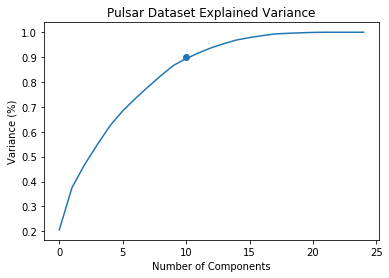

In [240]:
pca = PCA().fit(X_train1)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.scatter(10,.90)
plt.show()

In [241]:
pca = PCA(n_components=0.90)
X_reduced_train = pca.fit_transform(X_train1)
X_reduced_test=pca.transform(X_test1)

This will select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components. 

## KNN Regression with PCA 

In [242]:
param_grid = {'n_neighbors': [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,14,15,16,17,18,19,20]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_reduced_train, y_train1)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'n_neighbors': 18}
Best cross-validation score: 0.48


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                    weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform')

Text(0.5, 0, 'k')

Text(0, 0.5, 'Accuracy')

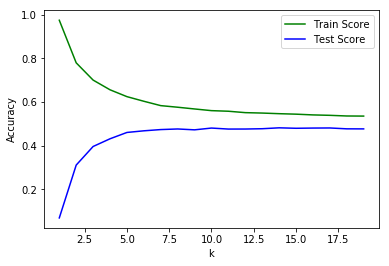

In [243]:
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsRegressor(k)
    knn.fit(X_reduced_train, y_train1)
    train_score_array.append(knn.score(X_reduced_train, y_train1))
    test_score_array.append(knn.score(X_reduced_test, y_test1))

x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [244]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsRegressor(n_neighbors=18), X_reduced_train, y_train1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(KNeighborsRegressor(n_neighbors=18), X_reduced_test, y_test1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.25590089 -0.27314712 -0.22020507 -0.2504303  -0.27663144 -0.23818027
 -0.26576002 -0.29927588 -0.28435573 -0.28514309]
Average cross-validation score: -0.26
rmse score: 0.51
Cross-validation scores: [-0.23679334 -0.28750026 -0.2241198  -0.24302286 -0.3486638  -0.21859829
 -0.31298546 -0.26905071 -0.26402912 -0.23604645]
Average cross-validation score: -0.26
rmse score: 0.51


## Linear Regression with PCA

In [245]:
lreg = LinearRegression()
lreg.fit(X_reduced_train, y_train1)
print(lreg.score(X_reduced_train, y_train1))
print(lreg.score(X_reduced_test, y_test1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.4857735268521827
0.4735843484369323


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 0, 'RM')

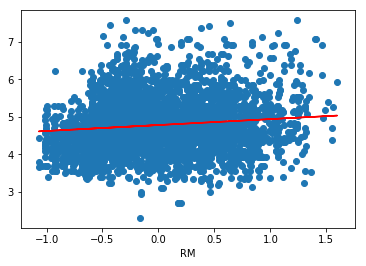

In [246]:
# plotting the best fit line
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_reduced_train[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train1)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train1)
plt.xlabel('RM')

In [247]:
# cross validation

scores = cross_val_score(LinearRegression(), X_reduced_train, y_train1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(LinearRegression(), X_reduced_test, y_test1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.24689326 -0.28108556 -0.2191009  -0.26166053 -0.28532281 -0.23213032
 -0.2501295  -0.30034453 -0.28303722 -0.2858731 ]
Average cross-validation score: -0.26
rmse score: 0.51
Cross-validation scores: [-0.27211854 -0.26742918 -0.24943138 -0.21133738 -0.33820142 -0.2702345
 -0.3042739  -0.26990811 -0.28378544 -0.22220095]
Average cross-validation score: -0.27
rmse score: 0.52


### Lasso Regression with PCA

In [249]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
grid_search = GridSearchCV(Lasso(random_state=0), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_reduced_train, y_train1)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.48


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=False)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=False)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

Text(0.5, 0, '$\\alpha$')

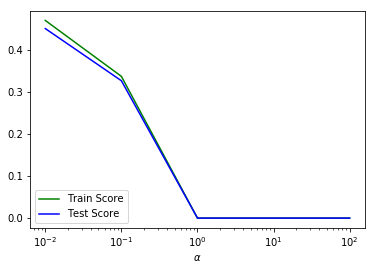

In [250]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha,random_state=0)
    lasso.fit(X_reduced_train,y_train1)
    train_score_list.append(lasso.score(X_reduced_train,y_train1))
    test_score_list.append(lasso.score(X_reduced_test, y_test1))
    
%matplotlib inline

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [251]:
scores = cross_val_score(Lasso(alpha=0.001), X_reduced_train, y_train1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(Lasso(alpha=0.001), X_reduced_test, y_test1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.2481921  -0.28108992 -0.21954724 -0.26195175 -0.28494024 -0.23102524
 -0.24979654 -0.30070444 -0.28256212 -0.28666672]
Average cross-validation score: -0.26
rmse score: 0.51
Cross-validation scores: [-0.2716126  -0.26755253 -0.24893514 -0.21392821 -0.33759647 -0.26871258
 -0.30586288 -0.26805057 -0.28476338 -0.22269944]
Average cross-validation score: -0.27
rmse score: 0.52


### Ridge Regression with PCA

In [252]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10,100]}
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
grid_search = GridSearchCV(Ridge(random_state=0), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_reduced_train, y_train1)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=0,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'alpha': 10}
Best cross-validation score: 0.48


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5, 0, '$\\alpha$')

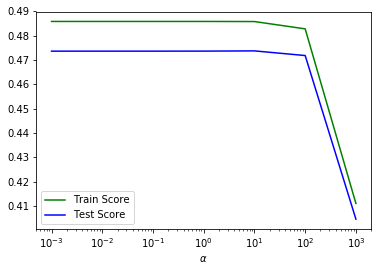

In [253]:
x_range = [0.001,0.01, 0.1, 1, 10,100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_reduced_train,y_train1)
    train_score_list.append(ridge.score(X_reduced_train,y_train1))
    test_score_list.append(ridge.score(X_reduced_test, y_test1))
    
%matplotlib inline

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [254]:
scores = cross_val_score(Ridge(alpha=10), X_reduced_train, y_train1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(Ridge(alpha=10), X_reduced_test, y_test1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.24727922 -0.28104934 -0.21928338 -0.262018   -0.28523967 -0.23161402
 -0.24988805 -0.30019181 -0.28283255 -0.28612228]
Average cross-validation score: -0.26
rmse score: 0.51
Cross-validation scores: [-0.27043246 -0.2662406  -0.24790495 -0.21542223 -0.33573011 -0.26637035
 -0.30720298 -0.26658212 -0.2863283  -0.2233891 ]
Average cross-validation score: -0.27
rmse score: 0.52


### Polynomial with PCA

In [255]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
train_score_list = []
test_score_list = []
lreg=LinearRegression()
for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly_p = poly.fit_transform(X_reduced_train)
    X_test_poly_p = poly.transform(X_reduced_test)
    lreg.fit(X_train_poly_p, y_train1)
    train_score_list.append(lreg.score(X_train_poly_p, y_train1))
    test_score_list.append(lreg.score(X_test_poly_p, y_test1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [256]:
print(train_score_list)
print(test_score_list)

[0.4857735268521827, 0.5591391123870517, 0.6480284054481711]
[0.4735843484369322, 0.5467944001049927, 0.48664476928338307]


Based on the above we can say this will be a polynomial of power 1 or linear

In [258]:
poly = PolynomialFeatures(1)
X_train_poly_p = poly.fit_transform(X_reduced_train)
X_test_poly_p = poly.transform(X_reduced_test)

scores = cross_val_score(LinearRegression(), X_train_poly_p, y_train1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(LinearRegression(), X_test_poly_p, y_test1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.24689326 -0.28108556 -0.2191009  -0.26166053 -0.28532281 -0.23213032
 -0.2501295  -0.30034453 -0.28303722 -0.2858731 ]
Average cross-validation score: -0.26
rmse score: 0.51
Cross-validation scores: [-0.27211854 -0.26742918 -0.24943138 -0.21133738 -0.33820142 -0.2702345
 -0.3042739  -0.26990811 -0.28378544 -0.22220095]
Average cross-validation score: -0.27
rmse score: 0.52


## Linear SVR with PCA

In [259]:
from sklearn.svm import LinearSVR

param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_reduced_train, y_train1)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'C': 1}
Best cross-validation score: 0.47


LinearSVR(C=1.0, dual=True, epsilon=0.001, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

LinearSVR(C=1.0, dual=True, epsilon=0.01, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

LinearSVR(C=1.0, dual=True, epsilon=1, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

LinearSVR(C=1.0, dual=True, epsilon=10, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

LinearSVR(C=1.0, dual=True, epsilon=100, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, '$\\alpha$')

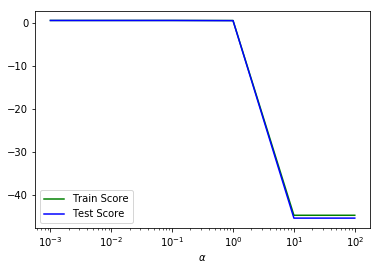

In [260]:
x_range = [0.001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for c in x_range: 
    linear_svm = LinearSVR(c)
    linear_svm.fit(X_reduced_train,y_train1)
    train_score_list.append(linear_svm.score(X_reduced_train,y_train1))
    test_score_list.append(linear_svm.score(X_reduced_test, y_test1))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [261]:
scores = cross_val_score(LinearSVR(C=1), X_reduced_train, y_train1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(LinearSVR(C=1), X_reduced_test, y_test1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.25041658 -0.28162962 -0.22180906 -0.26998301 -0.28726426 -0.23386116
 -0.25168202 -0.30465914 -0.28390612 -0.29294547]
Average cross-validation score: -0.27
rmse score: 0.52
Cross-validation scores: [-0.28412849 -0.27037219 -0.27634835 -0.20419491 -0.3309761  -0.25423435
 -0.29244616 -0.27749066 -0.30920944 -0.23377663]
Average cross-validation score: -0.27
rmse score: 0.52


### SVM Kernels with PCA

In [262]:
from sklearn.svm import SVR
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             }
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_reduced_train, y_train1)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'C': 1000, 'gamma': 0.01}
Best cross-validation score: 0.52


In [263]:
scores = cross_val_score(SVR(kernel='rbf',gamma=0.01,C=1000), X_reduced_train, y_train1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(SVR(kernel='rbf',gamma=0.01,C=1000), X_reduced_test, y_test1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.23368513 -0.25528483 -0.20175548 -0.24454218 -0.26963431 -0.21937536
 -0.23460885 -0.26522106 -0.2515932  -0.26025952]
Average cross-validation score: -0.24
rmse score: 0.49
Cross-validation scores: [-0.24825003 -0.29606367 -0.24931943 -0.21670268 -0.3194169  -0.21097688
 -0.25916741 -0.30836513 -0.25398729 -0.25870956]
Average cross-validation score: -0.26
rmse score: 0.51


## Poly kernel

In [265]:
from sklearn.svm import SVR
param_grid = {'C': [ 10, 100,1000],
              'gamma': [0.0001, 0.001, .01],
              'degree': [1,2,3]
             }
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_reduced_train, y_train1)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01], 'degree': [1, 2, 3]}


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 100, 1000], 'degree': [1, 2, 3],
                         'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'C': 1000, 'degree': 1, 'gamma': 0.01}
Best cross-validation score: 0.48


In [266]:
scores = cross_val_score(SVR(kernel='poly',gamma=0.01,C=1000,degree=1), X_reduced_train, y_train1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(SVR(kernel='poly',gamma=0.01,C=1000,degree=1), X_reduced_test, y_test1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.24786734 -0.28126129 -0.22005179 -0.26759882 -0.28511398 -0.23332418
 -0.24943057 -0.30242714 -0.28251708 -0.28962883]
Average cross-validation score: -0.27
rmse score: 0.52
Cross-validation scores: [-0.28030139 -0.268763   -0.26667424 -0.20701148 -0.33253134 -0.2516835
 -0.29195452 -0.27397141 -0.30138955 -0.23225078]
Average cross-validation score: -0.27
rmse score: 0.52


### Linear Kernel

In [267]:
from sklearn.svm import SVR
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             }
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_reduced_train, y_train1)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'C': 10, 'gamma': 0.001}
Best cross-validation score: 0.48


In [268]:

scores = cross_val_score(SVR(kernel='linear',gamma=.001,C=10), X_reduced_train, y_train1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(SVR(kernel='linear',gamma=0.001,C=10), X_reduced_test, y_test1,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-0.24784211 -0.28128104 -0.22002732 -0.26759941 -0.28510536 -0.23326465
 -0.24937307 -0.30243741 -0.28251819 -0.28963279]
Average cross-validation score: -0.27
rmse score: 0.52
Cross-validation scores: [-0.2802924  -0.26879316 -0.26672501 -0.20703738 -0.33237687 -0.25170836
 -0.29195129 -0.27393944 -0.30152092 -0.23223002]
Average cross-validation score: -0.27
rmse score: 0.52


### Results comparission of PCA with simple models

In [269]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
def score_print_reg(y,y_pred,count):
    b=[]
    b.append(sqrt(mean_squared_error(y,y_pred[count])))
    b.append(r2_score(y,y_pred[count]))
    b.append(mean_absolute_error(y,y_pred[count]))
    return b

In [273]:
knn_pca=KNeighborsRegressor(n_neighbors=18)
knn_pca.fit(X_reduced_train,y_train1)
linear_pca=LinearRegression()
linear_pca.fit(X_reduced_train,y_train1)
svm_lin_pca=SVR(kernel='linear',gamma=0.001,C=10)
svm_lin_pca.fit(X_reduced_train,y_train1)

svm_poly_pca=SVR(kernel='poly',gamma=0.01,C=1000,degree=1)
svm_poly_pca.fit(X_reduced_train,y_train1)

svm_rbf_pca=SVR(kernel='rbf',gamma=0.01,C=1000)
svm_rbf_pca.fit(X_reduced_train,y_train1)
linear_svr_pca=LinearSVR(C=1)
linear_svr_pca.fit(X_reduced_train,y_train1)

lasso_pca=Lasso(alpha=0.001)
lasso_pca.fit(X_reduced_train,y_train1)
ridge_pca=Ridge(alpha=10)
ridge_pca.fit(X_reduced_train,y_train1)
poly_pca=LinearRegression()
poly_pca.fit(X_train_poly_p,y_train1)

models_pca=[knn_pca,linear_pca,linear_svr_pca,svm_lin_pca,svm_poly_pca,svm_rbf_pca,lasso_pca,ridge_pca,poly_pca]
y_pred=[]
count=0
scores=[]
for i in models_pca:
    print(count)
    if (i!=poly_pca):
        y_pred.append(i.predict(pca.transform(X_test)))
        scores.append(score_print_reg(y_test1,y_pred,count))
    else:
        y_pred.append(i.predict(X_test_poly_p))
        scores.append(score_print_reg(y_test1,y_pred,count))
    count=count+1

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                    weights='uniform')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1000, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

LinearSVR(C=1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0
1
2
3
4
5
6
7
8


In [274]:
pca_models=pd.DataFrame()
pca_models['models']=['knn_pca','linear_pca','linear_svr_pca','svm_lin_pca','svm_poly_pca','svm_rbf_pca','lasso_pca','ridge_pca','poly_pca']
pca_models=pd.concat([pca_models,pd.DataFrame(scores)], axis=1)
pca_models.columns=['models','root_mean_squared_error','r2_score','mean_absolute_error']
pca_models

,models,root_mean_squared_error,r2_score,mean_absolute_error
0,knn_pca,0.512593,0.477338,0.393479
1,linear_pca,0.514431,0.473584,0.396798
2,linear_svr_pca,0.514262,0.473929,0.392380
3,svm_lin_pca,0.514103,0.474256,0.393258
4,svm_poly_pca,0.514101,0.474260,0.393260
5,svm_rbf_pca,0.475684,0.549896,0.368327
6,lasso_pca,0.514830,0.472766,0.397027
7,ridge_pca,0.514377,0.473694,0.396754
8,poly_pca,0.514431,0.473584,0.396798


In [275]:
knn=KNeighborsRegressor(n_neighbors=18)
knn.fit(X_train,y_train)
linear=LinearRegression()
linear.fit(X_train,y_train)


svm_lin=SVR(kernel='linear',gamma=0.001,C=10)
svm_lin.fit(X_train,y_train)

svm_poly=SVR(kernel='poly',gamma=0.01,C=1000,degree=1)
svm_poly.fit(X_train,y_train)

svm_rbf=SVR(kernel='rbf',gamma=0.01,C=1000)
svm_rbf.fit(X_train,y_train)
linear_svr=LinearSVR(C=1)
linear_svr.fit(X_train,y_train)

lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
ridge=Ridge(alpha=10)
ridge.fit(X_train,y_train)

lreg=LinearRegression()

poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly=LinearRegression()
poly.fit(X_train_poly,y_train)

models=[knn,linear,linear_svr,svm_lin,svm_poly,svm_rbf,lasso,ridge,poly]
y_pred=[]
count=0
scores=[]
for i in models:
    print(count)
    if (i!=poly):
        y_pred.append(i.predict(X_test))
        scores.append(score_print_reg(y_test,y_pred,count))
    else:
        y_pred.append(i.predict(X_test_poly))
        scores.append(score_print_reg(y_test,y_pred,count))
    count=count+1

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                    weights='uniform')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1000, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

LinearSVR(C=1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0
1
2
3
4
5
6
7
8


In [276]:
simple_models=pd.DataFrame()
simple_models['models']=['knn','linear','linear_svr','svm_lin','svm_poly','svm_rbf','lasso','ridge','poly']
simple_models=pd.concat([simple_models,pd.DataFrame(scores)], axis=1)
simple_models.columns=['models','root_mean_squared_error','r2_score','mean_absolute_error']
simple_models

,models,root_mean_squared_error,r2_score,mean_absolute_error
0,knn,0.497148,0.508361,0.386328
1,linear,0.476840,0.547708,0.364424
2,linear_svr,0.478087,0.545339,0.360750
3,svm_lin,0.478130,0.545256,0.360454
4,svm_poly,0.478088,0.545336,0.360437
5,svm_rbf,0.464425,0.570952,0.354264
6,lasso,0.477890,0.545713,0.365671
7,ridge,0.479413,0.542813,0.368121
8,poly,0.476942,0.547513,0.364157


In [277]:
concat_simple_pca=pd.concat([pca_models.transpose(),simple_models.transpose()],axis=1)
concat_simple_pca.columns=['knn_pca','linear_pca','linear_svr_pca','svm_lin_pca','svm_poly_pca','svm_rbf_pca','lasso_pca','ridge_pca','poly_pca','knn','linear','linear_svr','svm_lin','svm_poly','svm_rbf','lasso','ridge','poly']

concat_simple_pca.drop(['models'],inplace=True)

In [278]:
concat_reg=concat_simple_pca.sort_index(axis=1)
concat_reg

,knn,knn_pca,lasso,lasso_pca,linear,linear_pca,linear_svr,linear_svr_pca,poly,poly_pca,ridge,ridge_pca,svm_lin,svm_lin_pca,svm_poly,svm_poly_pca,svm_rbf,svm_rbf_pca
root_mean_squared_error,0.497148,0.512593,0.47789,0.51483,0.47684,0.514431,0.478087,0.514262,0.476942,0.514431,0.479413,0.514377,0.47813,0.514103,0.478088,0.514101,0.464425,0.475684
r2_score,0.508361,0.477338,0.545713,0.472766,0.547708,0.473584,0.545339,0.473929,0.547513,0.473584,0.542813,0.473694,0.545256,0.474256,0.545336,0.47426,0.570952,0.549896
mean_absolute_error,0.386328,0.393479,0.365671,0.397027,0.364424,0.396798,0.36075,0.39238,0.364157,0.396798,0.368121,0.396754,0.360454,0.393258,0.360437,0.39326,0.354264,0.368327


# Neural Network for Regression

In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [208]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_dim=25),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [209]:
model10 = build_model()

In [210]:
model10.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________


In [211]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)

history = model10.fit(
  X_train, np.asarray(y_train),
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop,PrintDot()])


.........................................

In [212]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(25)

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
16,0.211182,0.351504,0.211182,0.244070,0.371035,0.244070,16
17,0.212597,0.351967,0.212597,0.248384,0.378815,0.248384,17
18,0.211269,0.351152,0.211269,0.306699,0.436835,0.306699,18
19,0.208778,0.352911,0.208778,0.271081,0.401839,0.271081,19
20,0.207625,0.348187,0.207625,0.256387,0.379552,0.256386,20
21,0.207539,0.348824,0.207539,0.270980,0.387949,0.270980,21
22,0.209661,0.350339,0.209661,0.244375,0.372794,0.244375,22
23,0.206005,0.349067,0.206005,0.259280,0.382287,0.259280,23
24,0.200843,0.344053,0.200843,0.269714,0.398217,0.269714,24
25,0.202481,0.342273,0.202481,0.253284,0.379341,0.253284,25


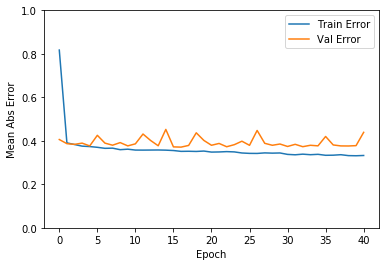

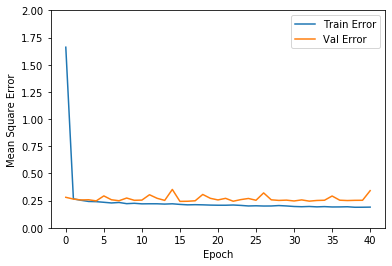

In [216]:
import matplotlib.pyplot as plt
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,2])
    plt.legend()
    plt.show()

plot_history(history)

Text(0.5, 0, 'True Values Audit_Risk')

Text(0, 0.5, 'Predictions Audit_Risk')

(2.4561156219756275, 7.801543744024372, 2.88260158874078, 6.534206778034732)

(2.4561156219756275, 7.801543744024372, 2.88260158874078, 8.228029710789524)

(0, 7.801543744024372)

(0, 8.228029710789524)

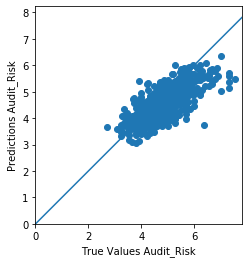

In [217]:
test_predictions = model10.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values Audit_Risk')
plt.ylabel('Predictions Audit_Risk')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 150], [0, 150])

In [222]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from math import sqrt

In [220]:
print("R2=",r2_score(y_test,test_predictions))

R2= 0.4313669764019017


In [223]:
print("RMSE",sqrt(mean_squared_error(y_test,test_predictions)))

RMSE 0.5346612428803281
